#ÍNDICE

`0` - Monitor da competição

`1` - Import das bibliotecas utilizadas no projeto

`2` - Load dos datasets

`3` - Análise exploratória <mark>**Documentação Parte 1**

>3.1 - Sumarização de datasets

>3.2 - Análise exploratória Sales dataset

>3.3 - Análise exploratória store dataset

>3.4 - Análise exploratória Features datasets

`4` - Pré processamento de dados <mark>**Documentação parte 2**

>4.1 - Join:

>4.2 - Sort values:

>4.3 - Dummies:

>4.4 - Drop:

>4.5 - Escalonamento:

>4.6 - Feature Selection:

5 - Modelagem <mark>**Documentação parte 3**:

>5.1 - Validação cruzada

>5.2 - Tuning de hiperparâmetros

>5.3 - Modelo final

6 - Avaliação do modelo e sugestão de melhorias <mark>**Documentação parte 4** 


## 0 -  Monitor da competição

In [11]:
# Informações pessoais de monitores excluídas nessa versão

## 1 - import das bibliotecas utilizadas no projeto

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import missingno as msno
import warnings
import datetime as dt
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2 - load dos datasets

In [ ]:
df1 = pd.read_csv("/content/sales data-set.csv")

In [ ]:
df2 = pd.read_csv("/content/stores data-set.csv")

In [ ]:
df3 = pd.read_csv("/content/Features data set.csv")

In [ ]:
df1.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False


In [ ]:
df2.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df3.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


## 3 - Análise exploratória (Documentação parte 1):

## sales_dataset:

Conjunto de dados composto por loja, departamento, data do lançamento da venda (as sexta-feiras, uma vez por semana), sem presença de valores duplicados, nulos e vazios. 

**Estrutura do dataset:**

Sales dataset | linhas/colunas : (421570, 5)

**Frequência de semanas com feriado (%):**

False    92.96

True      7.04



**Observações:**

O sales dataset possui dados de *2010 a 2012*;

A loja que *mais vendeu* no período foi a de número _20_, a que *menos vendeu* foi a loja 33;


O período anual de vendas contempla os anos de _2010_, _2011_ e _2012_, sendo *2011*, o ano com maior número de vendas;

A quantidade de vendas parecem obedecer um "_ciclo sazonal_", embora a frequência não seja uniforme;

As vendas entre as lojas embora diferentes em volume de venda, apresentam uniformidade temporal, ou seja, as fases de sazonalidade tendem a ser as mesmas para todas as lojas ;

A feature Weekly Sales será a variável **target** do modelo uma vez que ela apresenta os valores semanais de venda;

## store_dataset:

Conjunto de dados composto pelo Id da Loja, tipo da loja e tamanho da loja em unidades, existem 45 lojas listadas no dataset e seus tipos variam entre A, B e C.

**Estrutura do dataset**

Store_dataset | linhas/colunas : (45, 3)

**Frequência dos tipos de loja (%):**

A    48.89

B    37.78

C    13.33


## Features dataset:

Conjunto de dados composto por ID da loja, data, temperatura, Preço do combustível, markdown (1 a ao 5), taxa de inflação, taxa de desemprego e feriado semanal, presença de valores nulos, ausência de valores duplicados. 

**Estrutura do dataset**

Features Dataset | linhas/colunas : (8190, 16)

**Valores nulos**

Store              0

Date               0

Temperature        0

Fuel_Price         0

MarkDown1       4158

MarkDown2       5269

MarkDown3       4577

MarkDown4       4726

MarkDown5       4140

CPI              585

Unemployment     585

IsHoliday          0



**Observações**:

O feature dataset possui dados de *2010 a 2014*;

 A taxa de inflação apresenta tendência de crescimento enquanto a taxa de desemprego descrece com o passar do tempo. Esse fato ajuda a explicar a presença de correlação (Pearson) negativa, ainda que fraca em relação a essas duas features;

A alta quantidade de valores nulos das features de markdown, além da presença de correlação entre markdown  4 e 1 podem prejudicar o desempenho do modelo, talvez, faça sentido retirá-las do conjunto de dados na etapa de pré-processamento;

Nenhuma correlação de caráter linear foi encontrada considerando as features de temperatura e preço do combustível. Talvez, pela diferença escalar entre as diversas features do dataset, a correlação entre elas não tenha ficado aparente. Havendo necessidade em etapa posterior, o escalonamento das variáveis deverá ser realizado e sua correlação novamente medida;






### 3.1 - Sumarização de datasets

In [ ]:
# Contagem de linhas e colunas dos datasets
print(f"Sales dataset | linhas/colunas : {df1.shape}\nStore Dataset | linhas/colunas : {df2.shape}\nFeatures Dataset | linhas/colunas : {df3.shape}")

Sales dataset | linhas/colunas : (421570, 5)
Store Dataset | linhas/colunas : (45, 3)
Features Dataset | linhas/colunas : (8190, 16)


In [ ]:
# descrição do dataset
df1.describe(include="all")

,Store,Dept,Date,Weekly_Sales,IsHoliday
count,421570.000000,421570.000000,421570,421570.000000,421570
unique,NaN,NaN,143,NaN,2
top,NaN,NaN,23/12/2011,NaN,False
freq,NaN,NaN,3027,NaN,391909
mean,22.200546,44.260317,NaN,15981.258123,NaN
std,12.785297,30.492054,NaN,22711.183519,NaN
min,1.000000,1.000000,NaN,-4988.940000,NaN
25%,11.000000,18.000000,NaN,2079.650000,NaN
50%,22.000000,37.000000,NaN,7612.030000,NaN
75%,33.000000,74.000000,NaN,20205.852500,NaN


In [ ]:
# descrição do dataset
df2.describe(include="all")

,Store,Type,Size
count,45.000000,45,45.000000
unique,NaN,3,NaN
top,NaN,A,NaN
freq,NaN,22,NaN
mean,23.000000,NaN,130287.600000
std,13.133926,NaN,63825.271991
min,1.000000,NaN,34875.000000
25%,12.000000,NaN,70713.000000
50%,23.000000,NaN,126512.000000
75%,34.000000,NaN,202307.000000


In [ ]:
# descrição do dataset
df3.describe(include="all")

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,05/02/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7605
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,NaN
50%,23.000000,NaN,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000,NaN
75%,34.000000,NaN,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000,NaN


In [ ]:
# Verificação de tipos de variáveis e integridade do dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [ ]:
# Verificação de tipos de variáveis e integridade do dataset
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
# Verificação de tipos de variáveis e integridade do dataset
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [ ]:
# Contagem de valores missings
valores_nulos_df1 = df1.isnull().sum()
valores_nulos_df1

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [ ]:
# Contagem de valores missings
valores_nulos_df2 = df2.isnull().sum()
valores_nulos_df2

Store    0
Type     0
Size     0
dtype: int64

In [ ]:
valores_nulos_df3 = df3.isnull().sum()
valores_nulos_df3

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [ ]:
# Contagem de valores duplicados
valores_duplicados_df1 = df1.duplicated().sum()
valores_duplicados_df1

0

In [ ]:
# Contagem de valores duplicados
valores_duplicados_df2 = df2.duplicated().sum()
valores_duplicados_df2

0

In [ ]:
# Contagem de valores duplicados
valores_duplicados_df3 = df3.duplicated().sum()
valores_duplicados_df3

0

<Axes: >

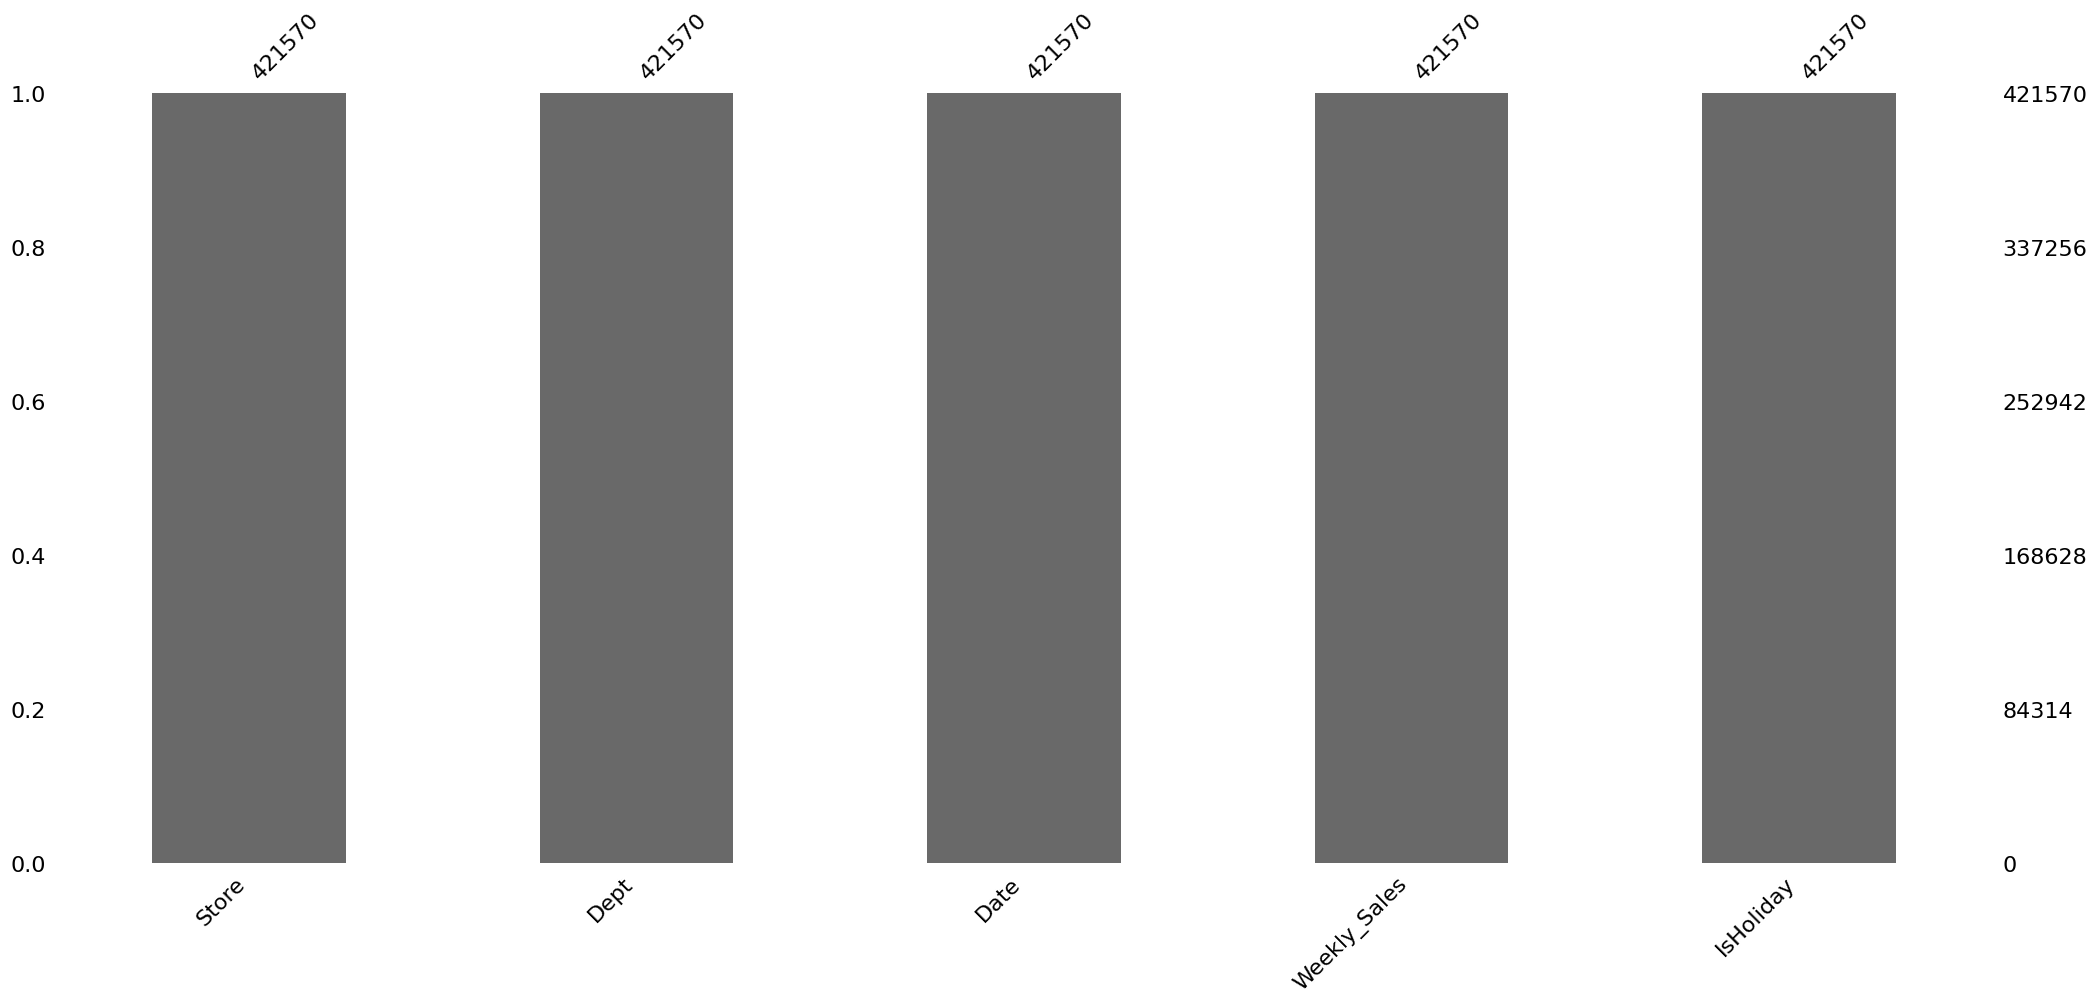

In [ ]:
# visualização de missings

msno.bar(df1)

<Axes: >

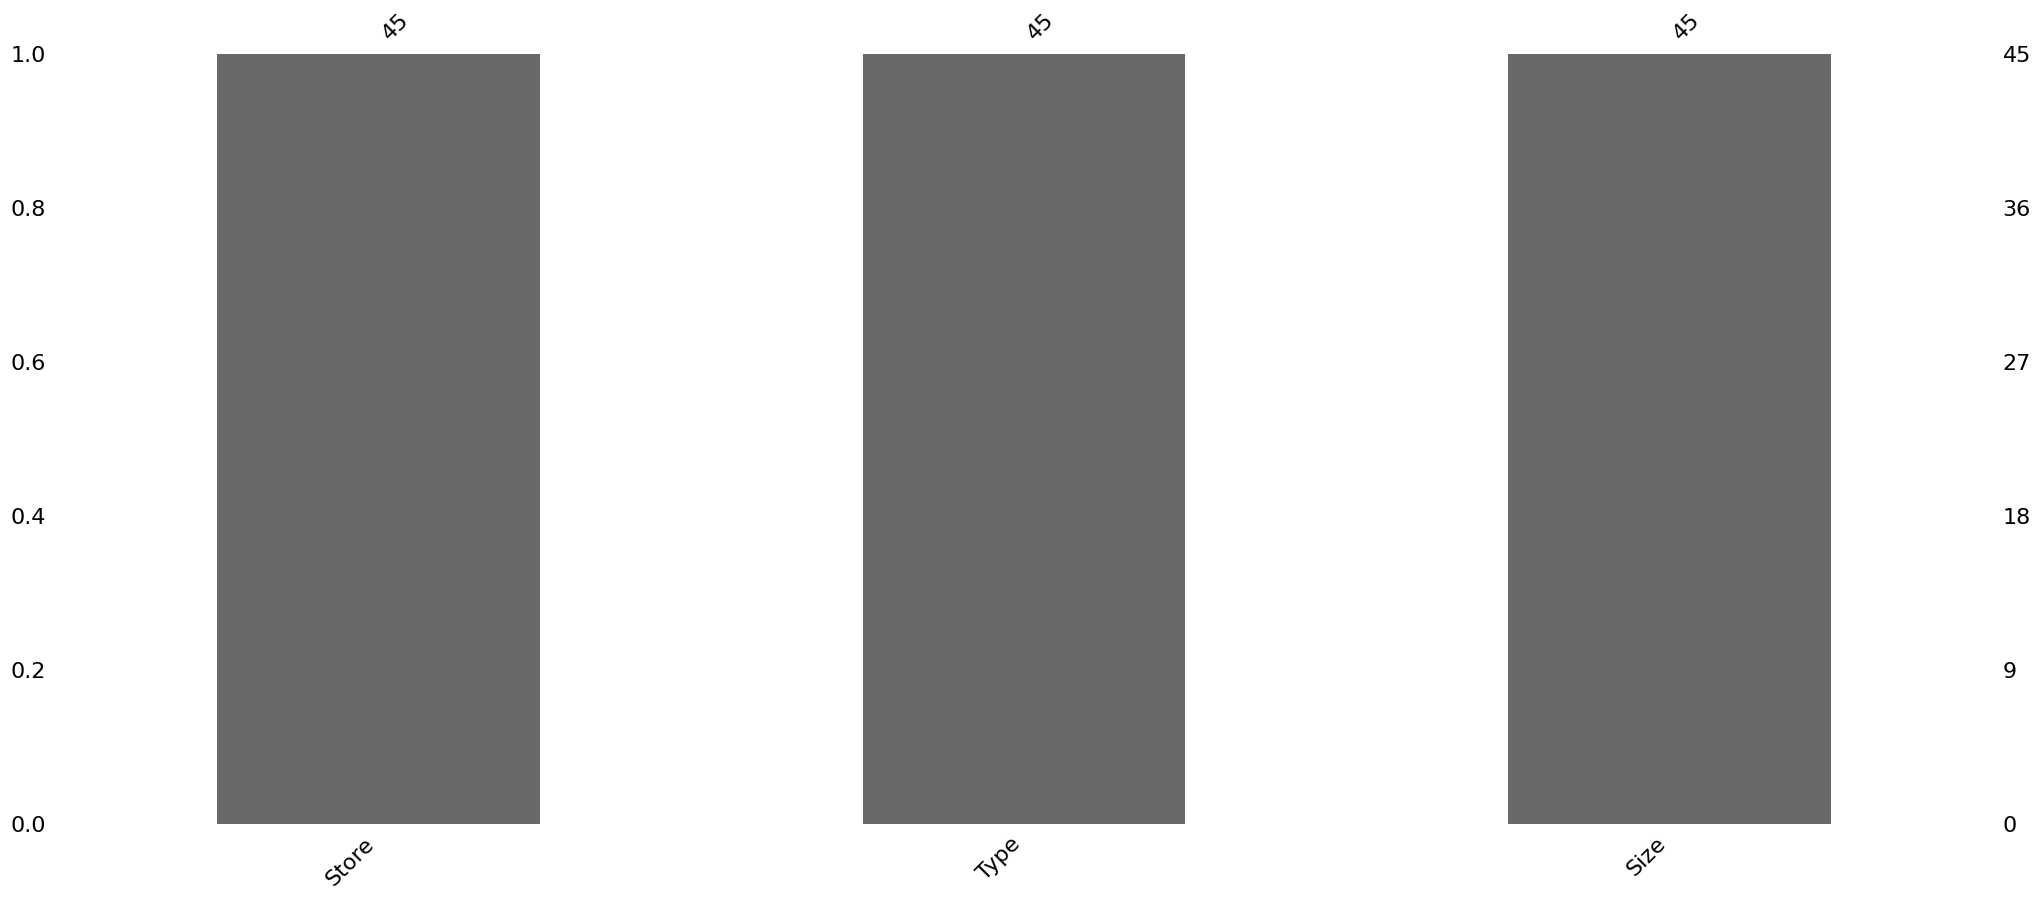

In [ ]:
# visualização de missings 
msno.bar(df2)

<Axes: >

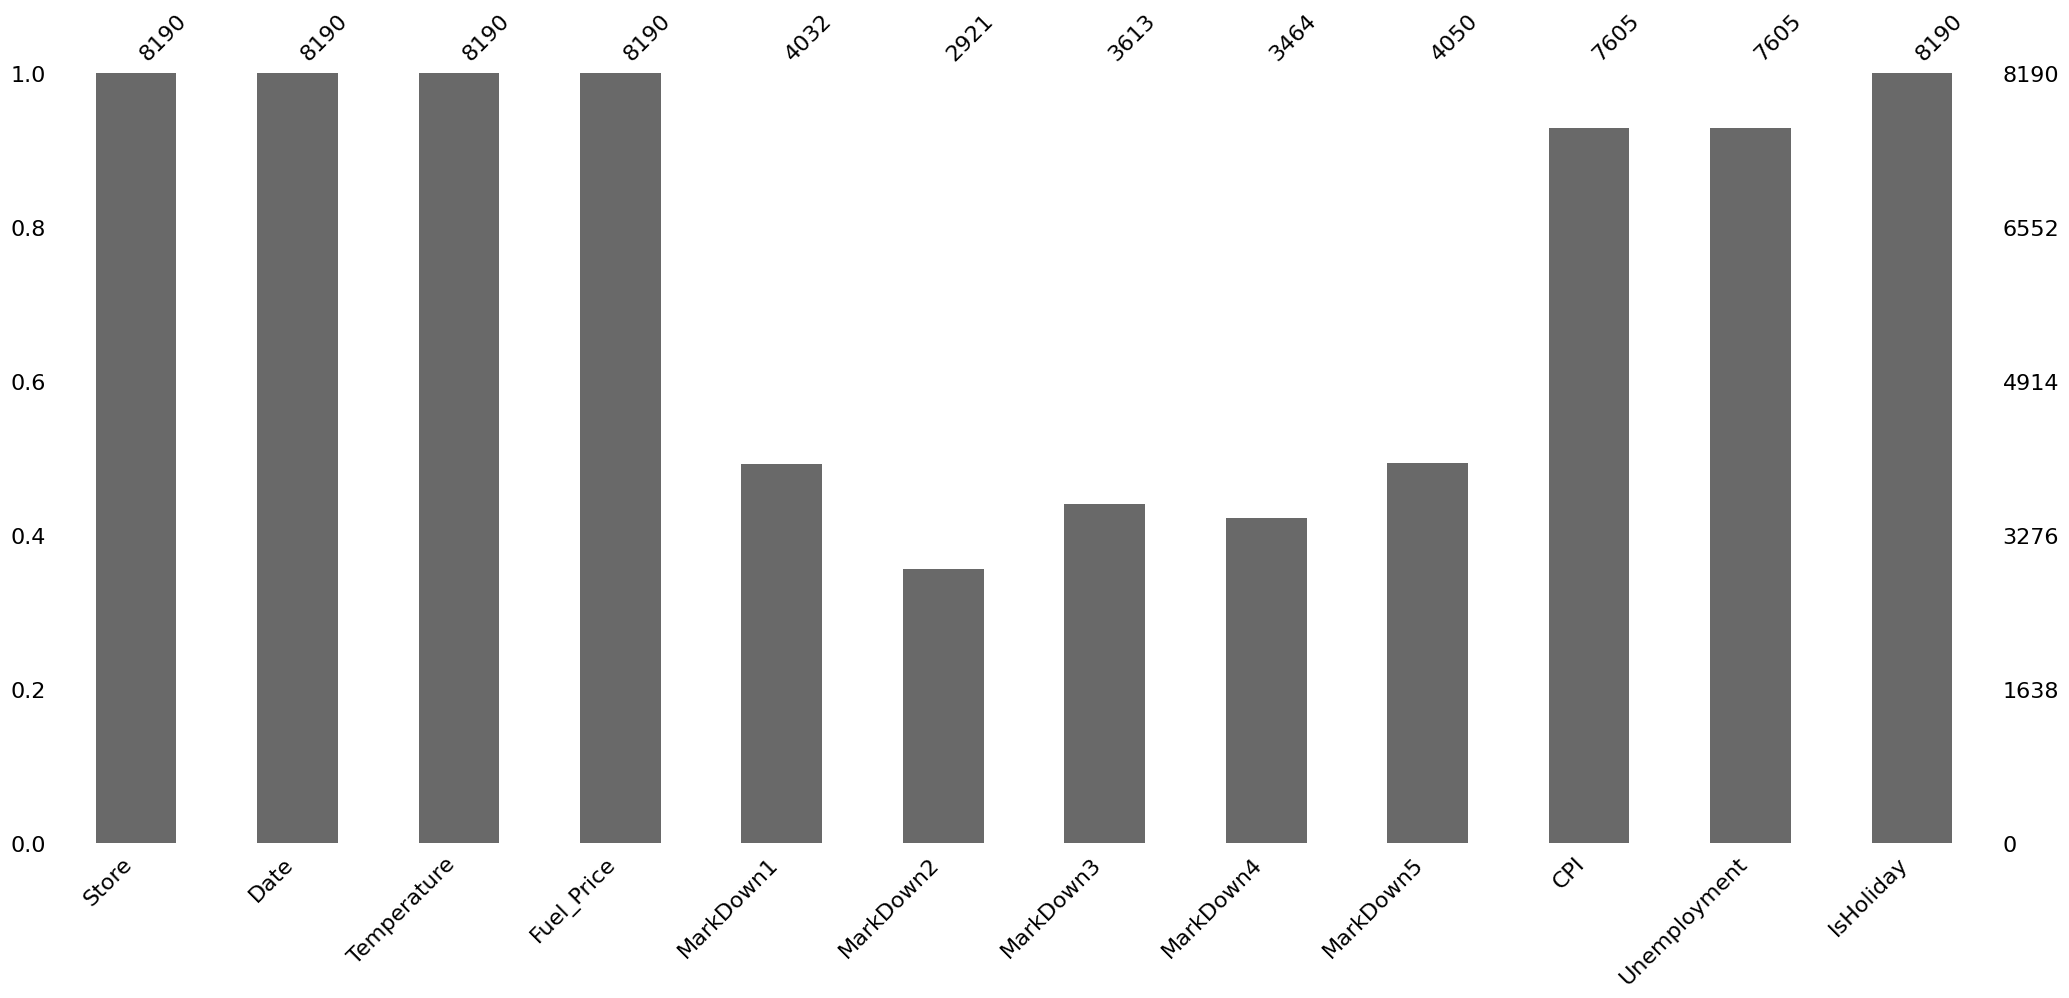

In [ ]:
# visualização de missings 
msno.bar(df3)

In [ ]:
# preparação para os plots
# Converter a coluna "Date" para o formato "yyyy-mm-dd"
df1['Date'] = pd.to_datetime(df1['Date'], format='%d/%m/%Y')
df3["Date"] = pd.to_datetime(df3["Date"])
# Adicionar colunas para o ano, mês, dia da semana e número da semana correspondentes
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['WeekNumber'] = df1['Date'].dt.isocalendar().week
df1['day'] = df1['Date'].dt.day
df3['day'] = df3['Date'].dt.day
df3['WeekNumber'] = df3['Date'].dt.isocalendar().week

### 3.1 - Análise exploratória Sales dataset

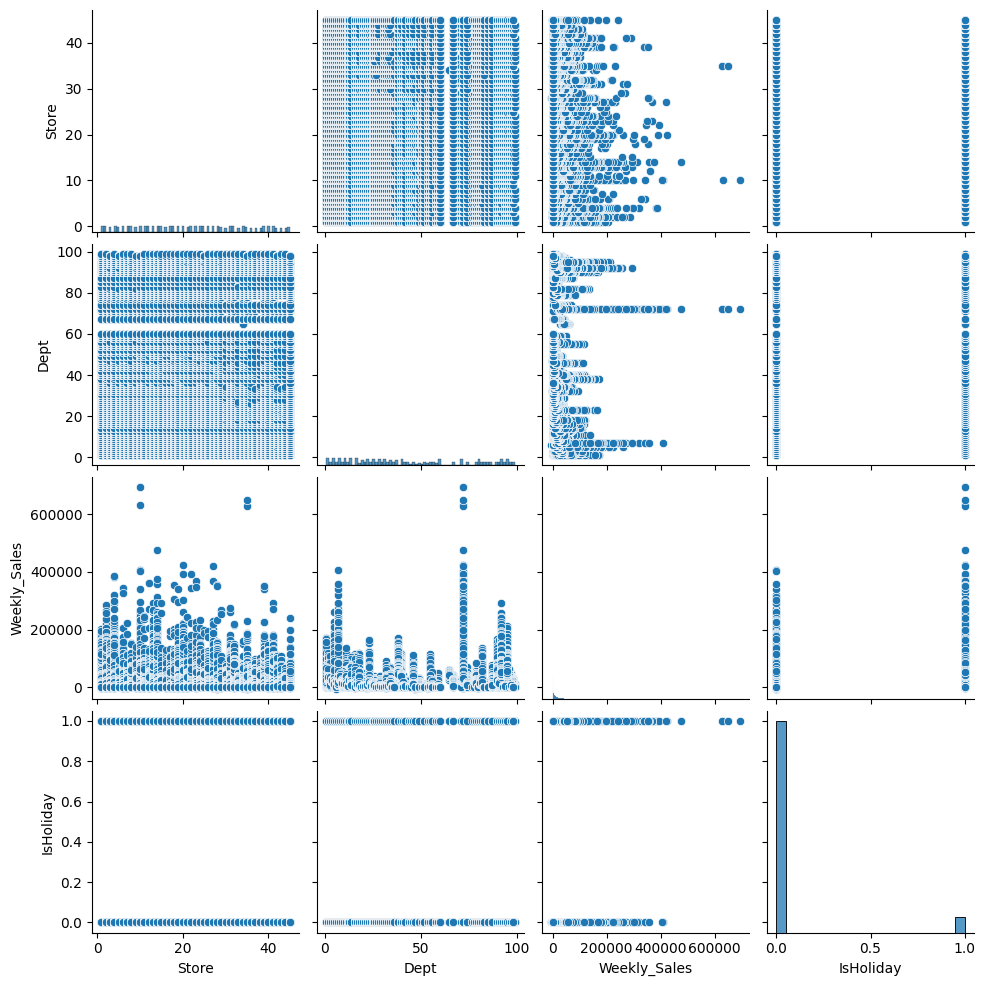

In [ ]:
sns.pairplot(df1)

In [ ]:
#Contagem de semanas com feriado
round(df1.IsHoliday.value_counts(normalize=True)*100,2)

False    92.96
True      7.04
Name: IsHoliday, dtype: float64

In [ ]:
#Agrupamentos e filtragens do sales dataset por mês e ano para plots

sales_2010 = df1.where(df1['Year'] == 2010)
sales_2011 = df1.where(df1['Year'] == 2011)
sales_2012 = df1.where(df1['Year'] == 2012)
month_year_2010 = sales_2010.groupby("Month").sum()['Weekly_Sales']
month_year_2011 = sales_2011.groupby("Month").sum()['Weekly_Sales']
month_year_2012 = sales_2012.groupby("Month").sum()['Weekly_Sales']
holiday_sales = df1.groupby('IsHoliday').sum()['Weekly_Sales']
non_holiday_sales = df1[df1['IsHoliday'] == False].groupby('IsHoliday').sum()['Weekly_Sales']


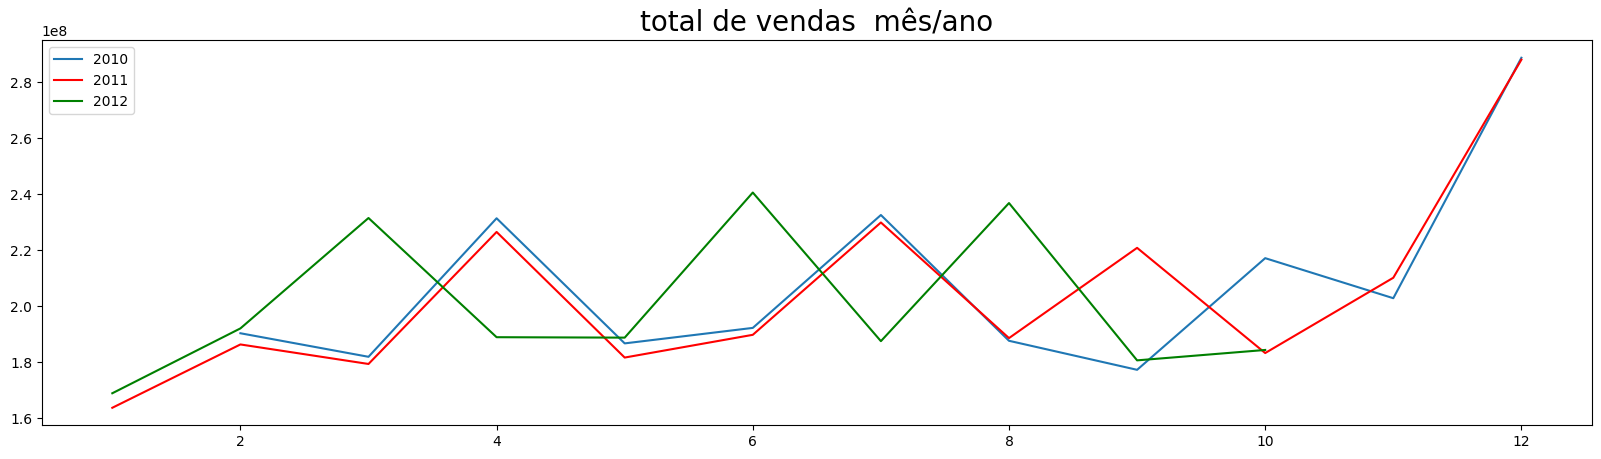

In [ ]:
plt.figure(figsize=(20,5))
plt.title("total de vendas  mês/ano", size = 20)
plt.plot(month_year_2010, label=2010)
plt.plot(month_year_2011, color="r", label=2011)
plt.plot(month_year_2012, color="g", label=2012)
plt.legend()
plt.show()

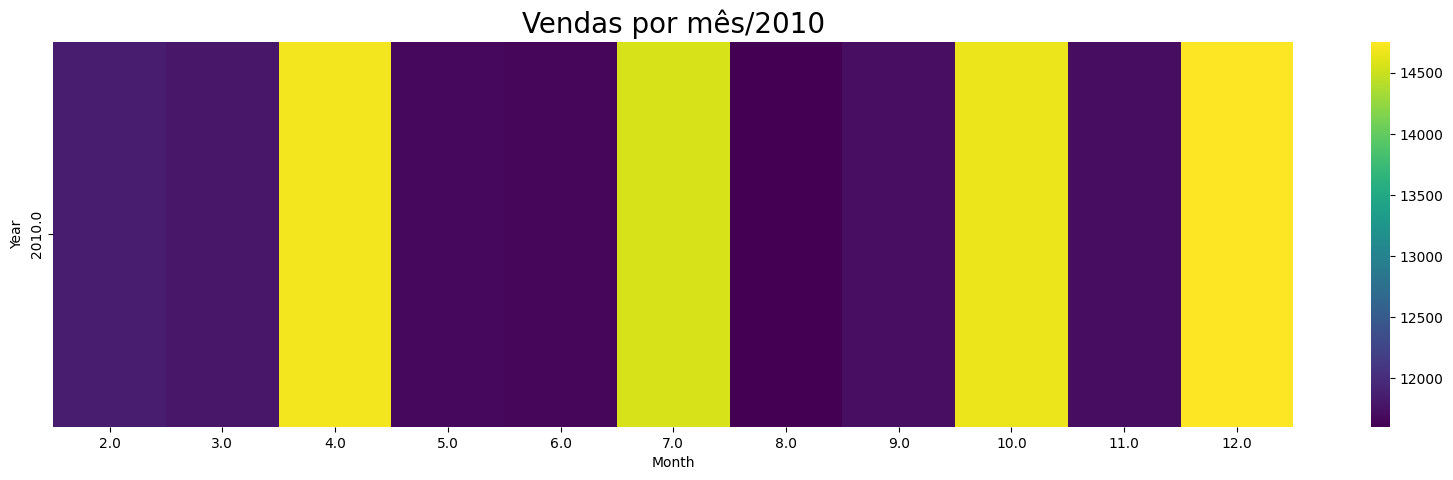

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Vendas por mês/2010", size = 20)
month_Year_sales = sales_2010.groupby(["Year", "Month"]).count()["Weekly_Sales"].unstack()
sns.heatmap(month_Year_sales, cmap="viridis")
plt.show()

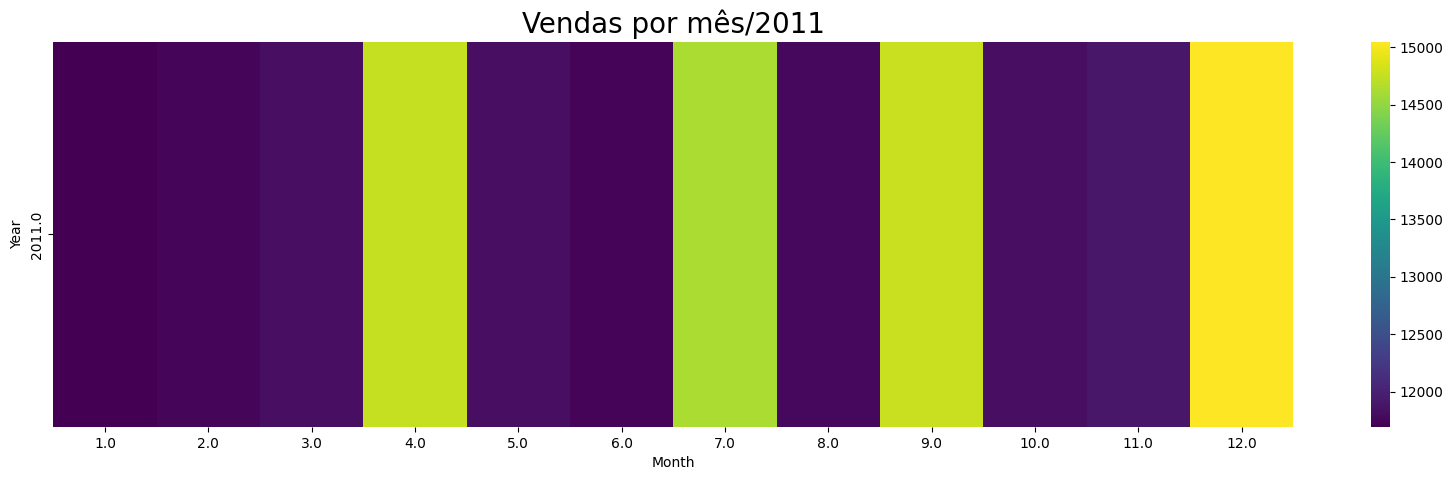

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Vendas por mês/2011", size = 20)
month_Year_sales = sales_2011.groupby(["Year", "Month"]).count()["Weekly_Sales"].unstack()
sns.heatmap(month_Year_sales,cmap="viridis")
plt.show()

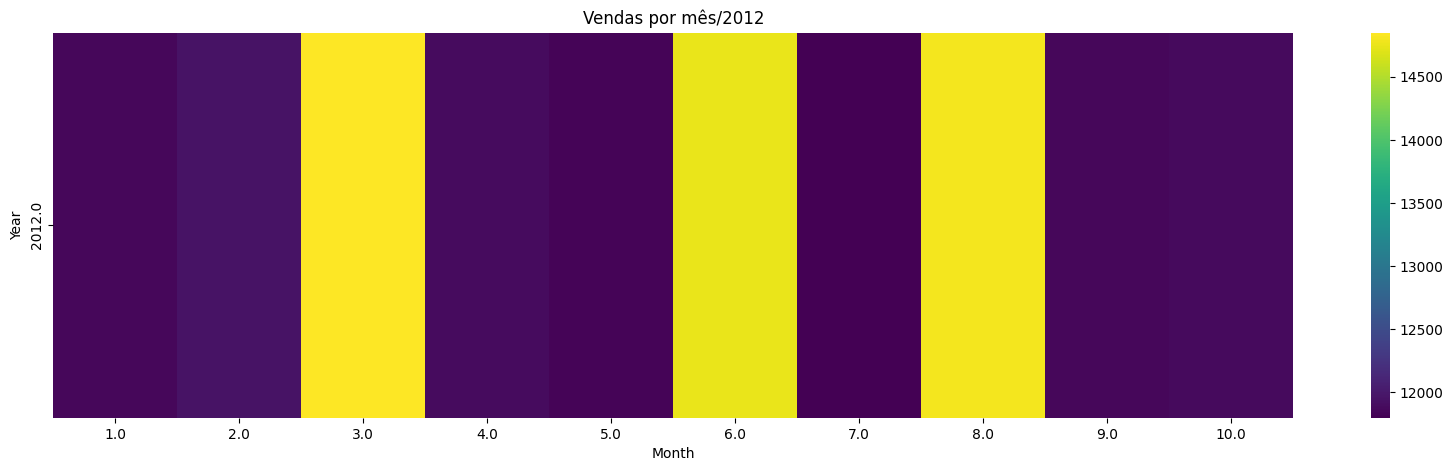

In [ ]:
plt.figure(figsize=(20,5))

plt.title("Vendas por mês/2012")
month_Year_sales = sales_2012.groupby(["Year", "Month"]).count()["Weekly_Sales"].unstack()
sns.heatmap(month_Year_sales,cmap="viridis")
plt.show()

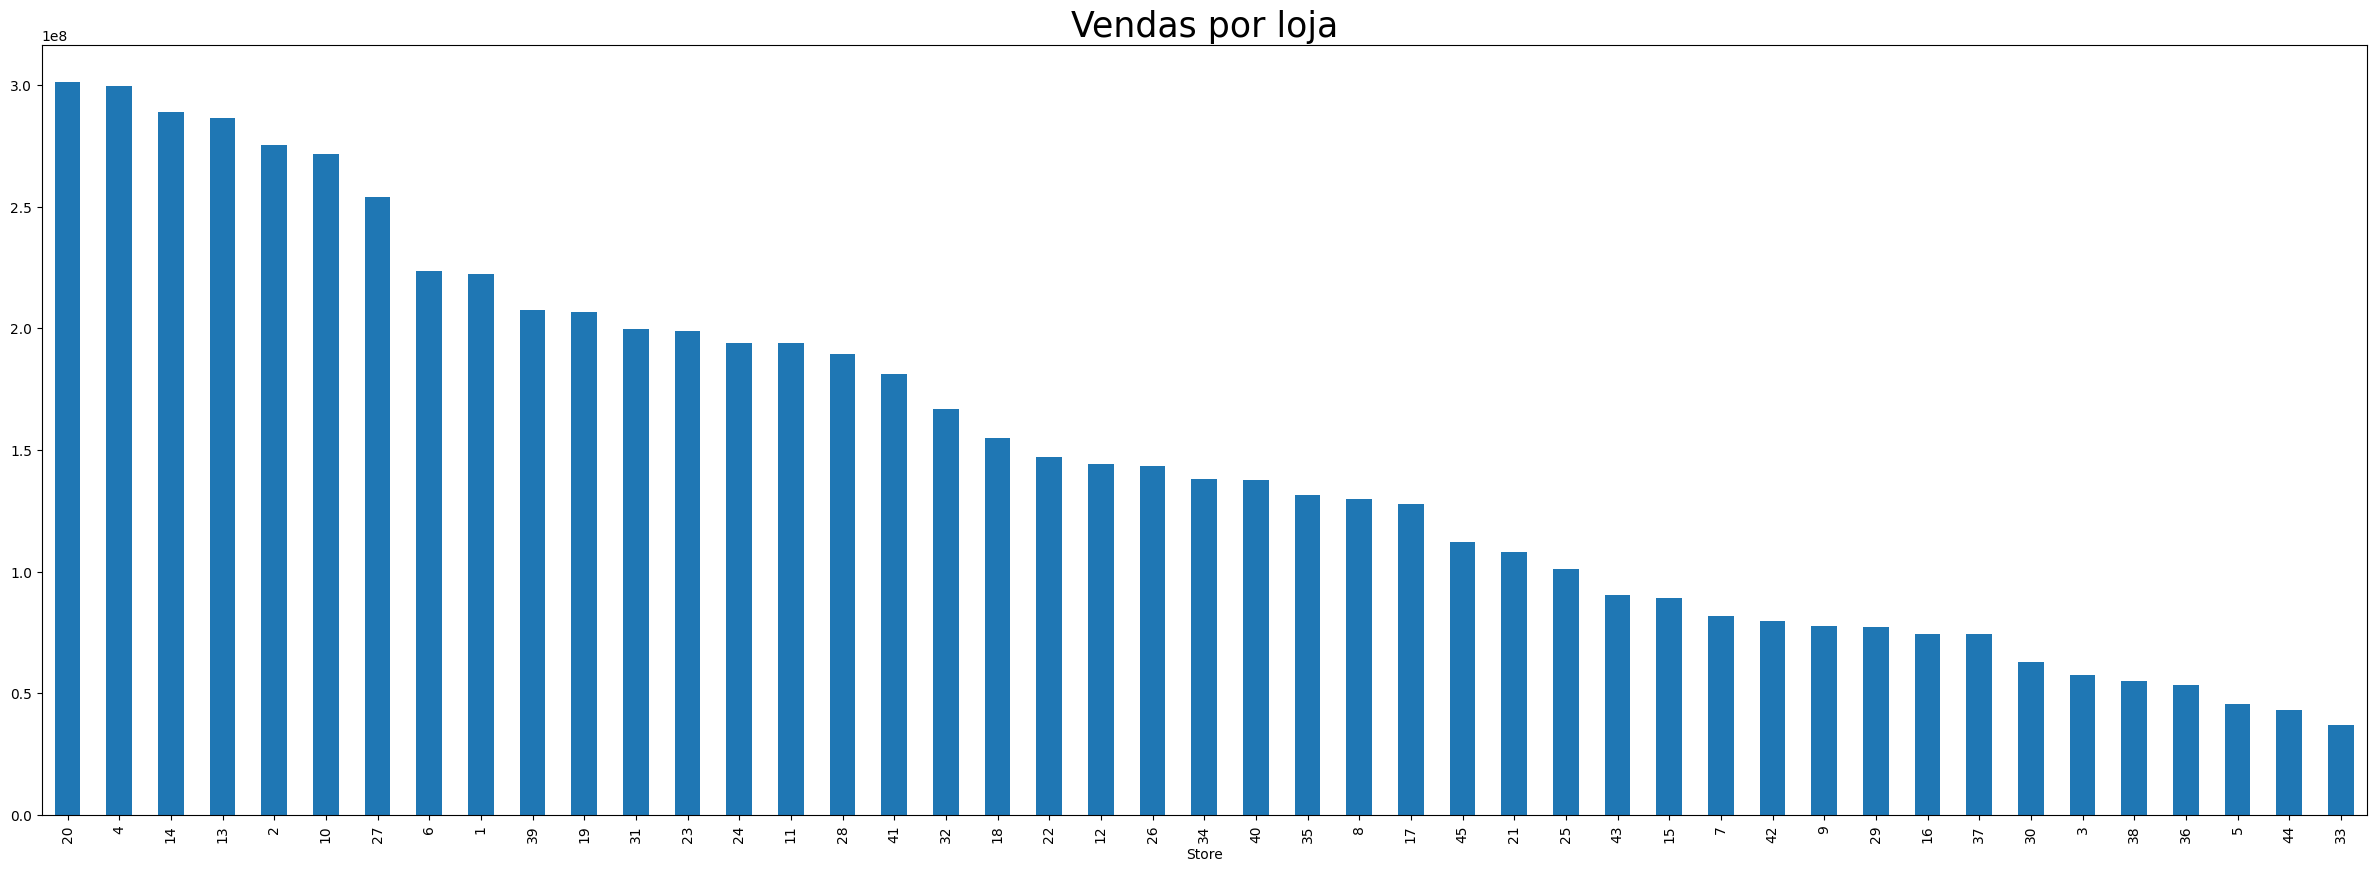

In [ ]:
plt.figure(figsize=(30,10))


store_sales_sum = df1.groupby("Store").Weekly_Sales.sum()
store_sales_sum = store_sales_sum.sort_values(ascending=False)
plt.title("Vendas por loja",size=25)
store_sales_sum.plot.bar()
plt.show()

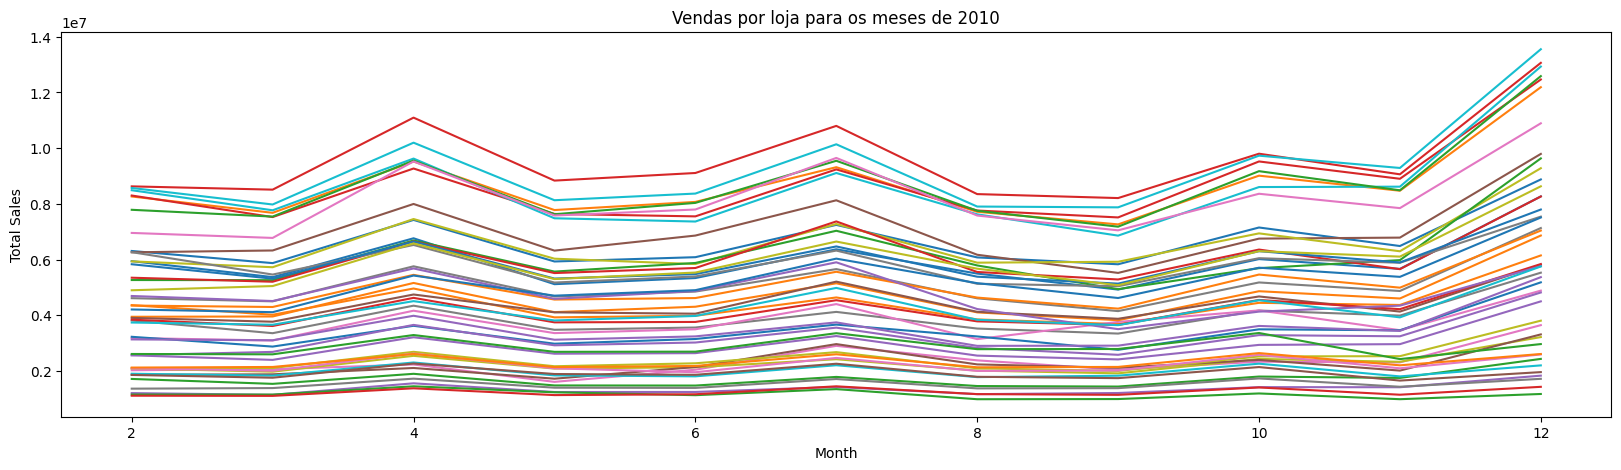

In [ ]:
store_month_sales = sales_2010.groupby(['Store', 'Month']).sum()['Weekly_Sales']

# create a line graph of the sales data for each store during the months of 2010
fig, ax = plt.subplots(figsize=(20, 5))
for store in store_month_sales.index.get_level_values('Store').unique():
    ax.plot(store_month_sales[store], label=f'Store {store}')

ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Vendas por loja para os meses de 2010')
plt.show()

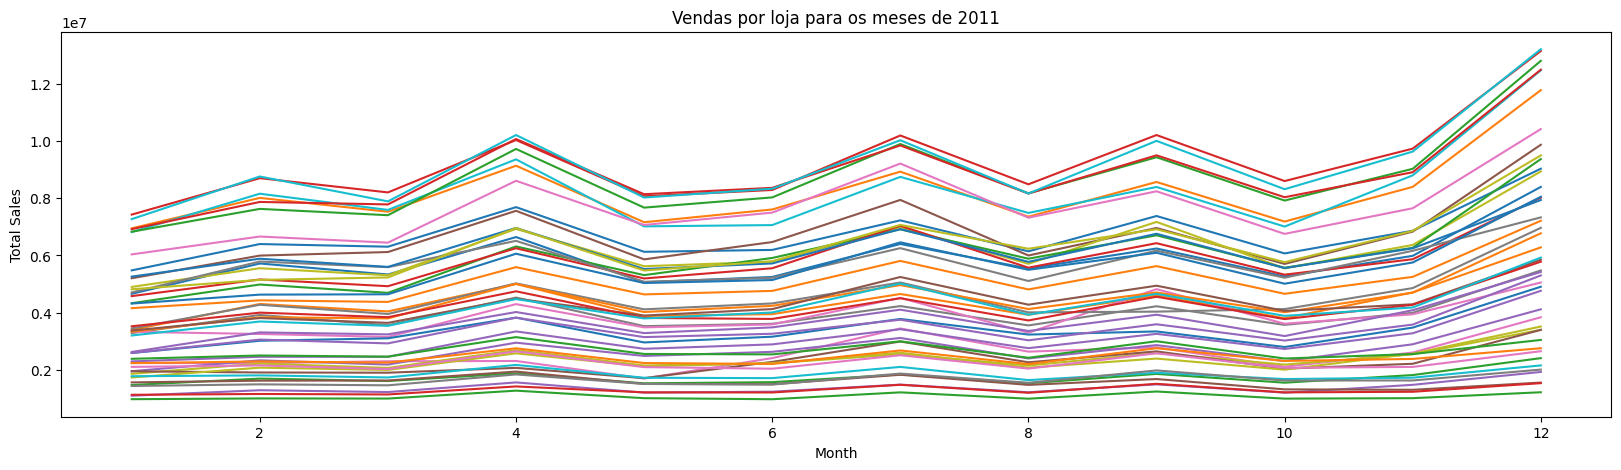

In [ ]:
store_month_sales = sales_2011.groupby(['Store', 'Month']).sum()['Weekly_Sales']

# create a line graph of the sales data for each store during the months of 2010
fig, ax = plt.subplots(figsize=(20, 5))
for store in store_month_sales.index.get_level_values('Store').unique():
    ax.plot(store_month_sales[store], label=f'Store {store}')

ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Vendas por loja para os meses de 2011')
plt.show()

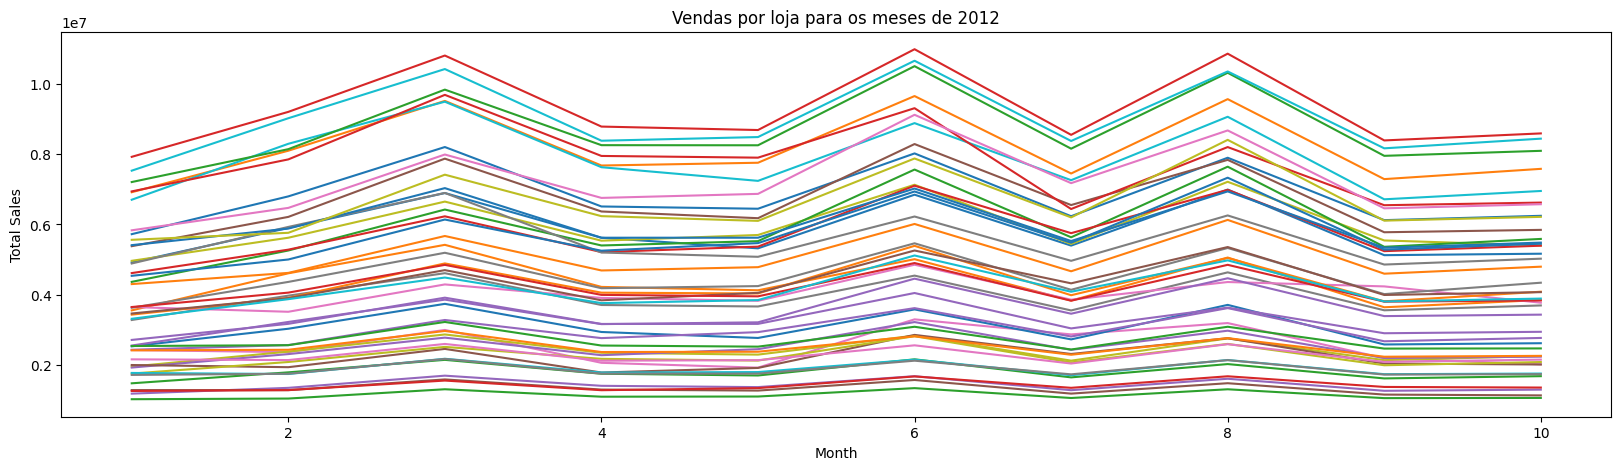

In [ ]:
store_month_sales = sales_2012.groupby(['Store', 'Month']).sum()['Weekly_Sales']

# create a line graph of the sales data for each store during the months of 2010
fig, ax = plt.subplots(figsize=(20, 5))
for store in store_month_sales.index.get_level_values('Store').unique():
    ax.plot(store_month_sales[store], label=f'Store {store}')

ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Vendas por loja para os meses de 2012')
plt.show()

### 3.2 - Análise exploratória store dataset

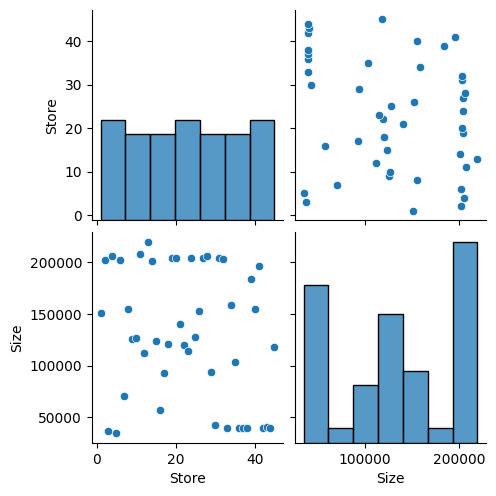

In [ ]:
sns.pairplot(df2)

In [ ]:
#Frequência dos tipos de loja
print("Frequência dos tipos de loja (%)\n",round(df2.Type.value_counts(normalize=True)*100,2))

Frequência dos tipos de loja (%)
 A    48.89
B    37.78
C    13.33
Name: Type, dtype: float64


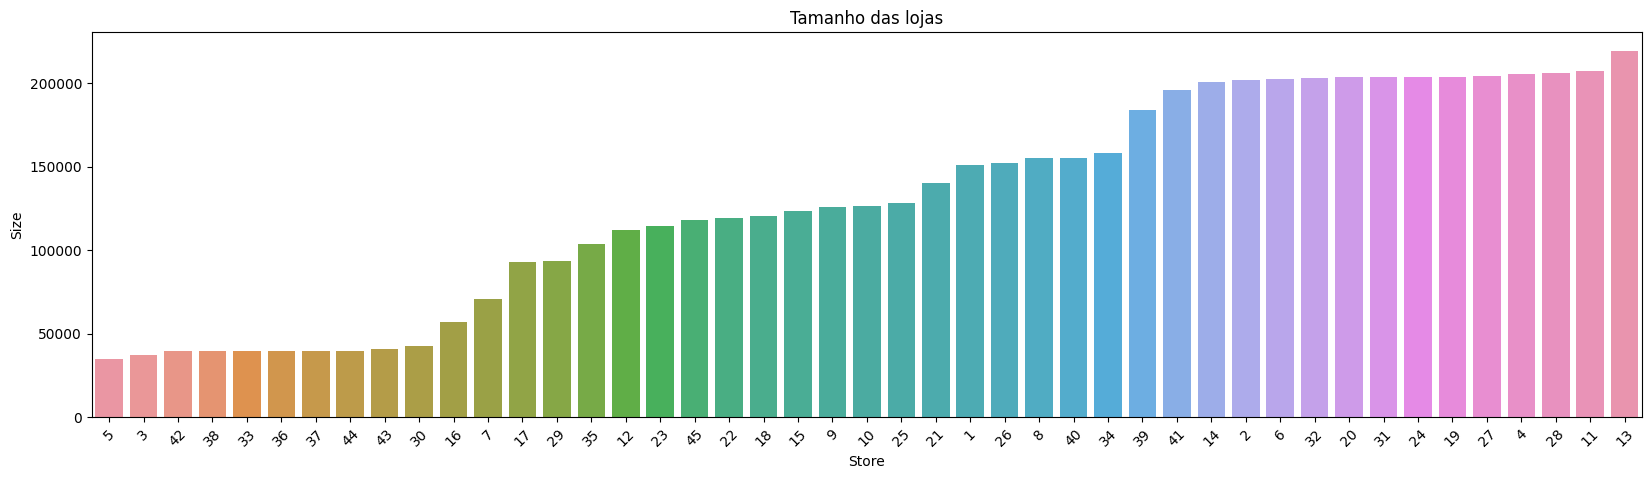

In [ ]:
#Tamanho da lojas
plt.figure(figsize=(20, 5))
plt.title("Tamanho das lojas")
sns.barplot(data= sorted_df2, x = df2.Store, y = df2.Size, order=df2.sort_values('Size').Store)
plt.xticks(rotation=45)
plt.show()

### 3.3 - Análise exploratória Features datasets

In [ ]:
#Criação de colunas de data para plots
df3['day'] = df3['Date'].dt.day
df3['WeekNumber'] = df3['Date'].dt.isocalendar().week
df3['Year'] = df3['Date'].dt.year
df3['Month'] = df3['Date'].dt.month

In [ ]:
#Contagem de semanas com feriado
df3.IsHoliday.value_counts(normalize=True)

False    0.928571
True     0.071429
Name: IsHoliday, dtype: float64

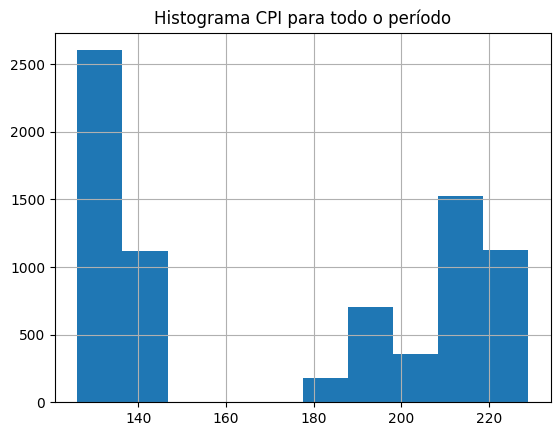

In [ ]:

df3.CPI.hist()
plt.title("Histograma CPI para todo o período")
plt.show()

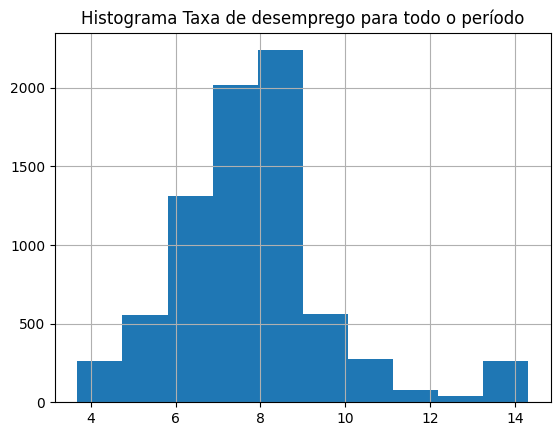

In [ ]:
#Preencher com média
df3.Unemployment.hist()
plt.title("Histograma Taxa de desemprego para todo o período")
plt.show()

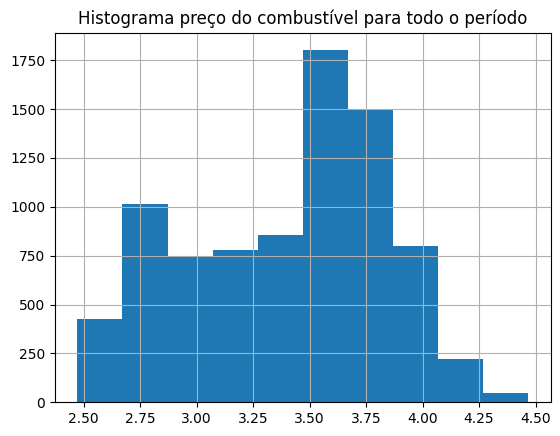

In [ ]:
df3.Fuel_Price.hist()
plt.title("Histograma preço do combustível para todo o período")
plt.show()

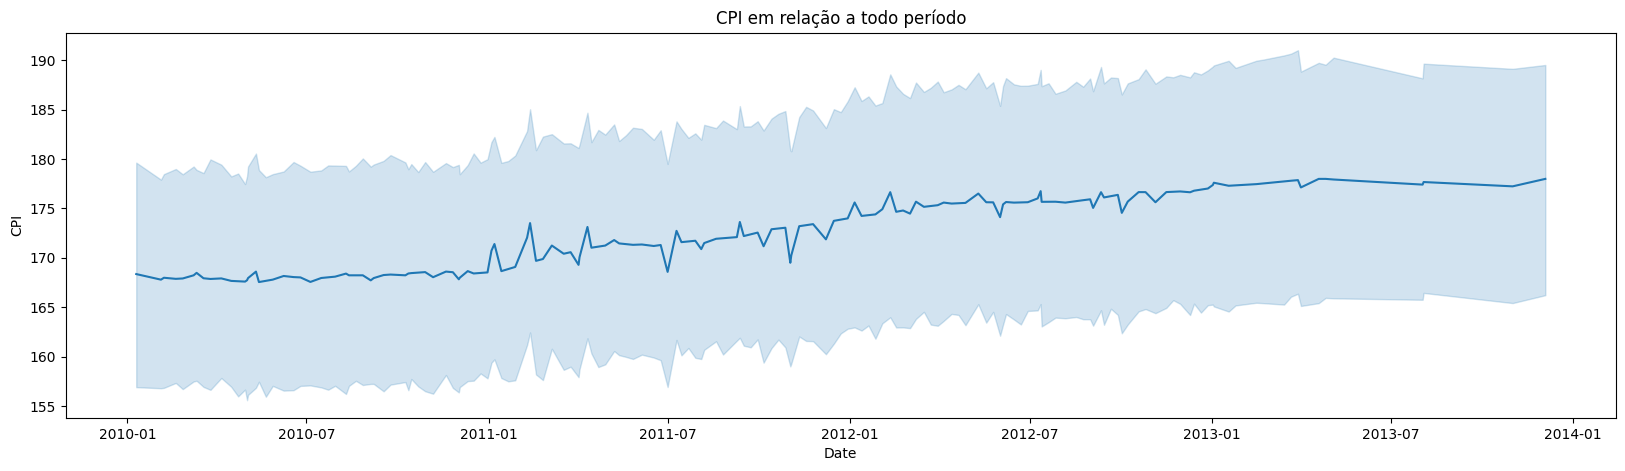

In [ ]:
#inflação para todo o período de tempo do dataset
plt.figure(figsize=(20,5))
plt.title("CPI em relação a todo período")
sns.lineplot(data=df3 , x = df3.Date, y = df3.CPI)
plt.show()

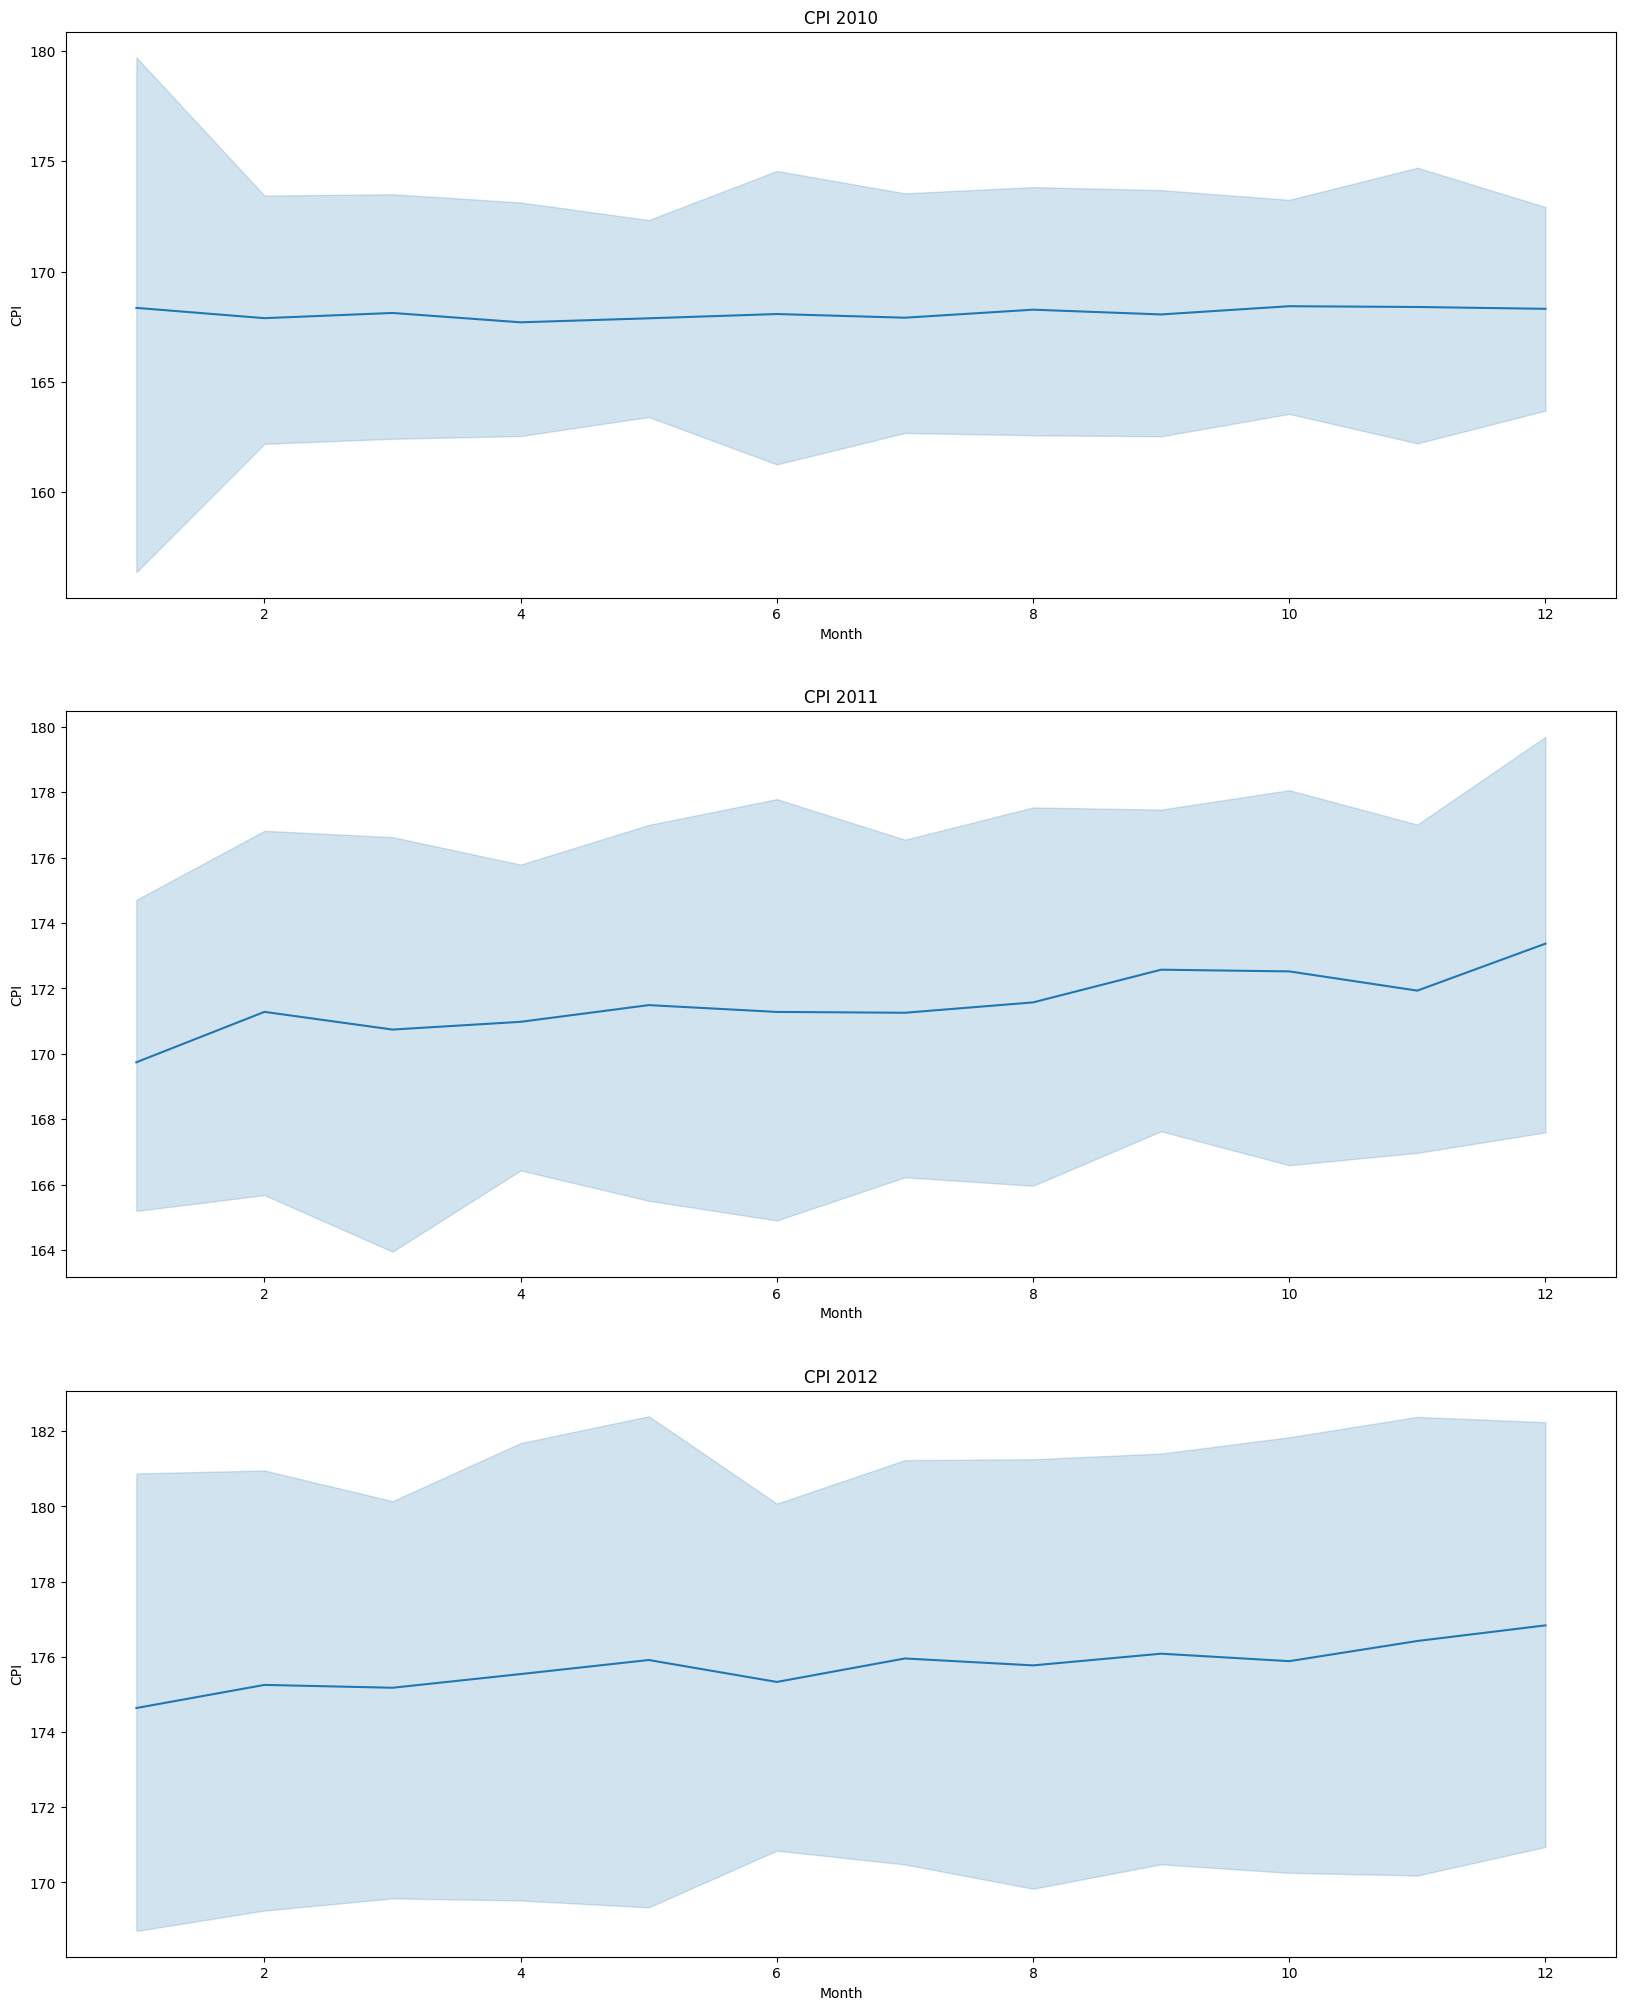

In [ ]:
#Plot de taxa de inflação para os anos 2010, 2011  e 2012
plt.figure(figsize=(20,25))
plt.subplot(3,1,1)
df3_2010 = df3.where(df3['Year'] == 2010)
plt.title("CPI 2010")
sns.lineplot(data=df3_2010 , x = df3_2010.Month, y = df3_2010.CPI)

plt.subplot(3,1,2)
df3_2011 = df3.where(df3['Year'] == 2011)
plt.title("CPI 2011")
sns.lineplot(data=df3_2011 , x = df3_2011.Month, y = df3_2011.CPI)

plt.subplot(3,1,3)
df3_2012 = df3.where(df3['Year'] == 2012)
plt.title("CPI 2012")
sns.lineplot(data=df3_2012 , x = df3_2012.Month, y = df3_2012.CPI)
plt.show()

<Axes: title={'center': 'Taxa de desemprego em relação a todo período'}, xlabel='Date', ylabel='Unemployment'>

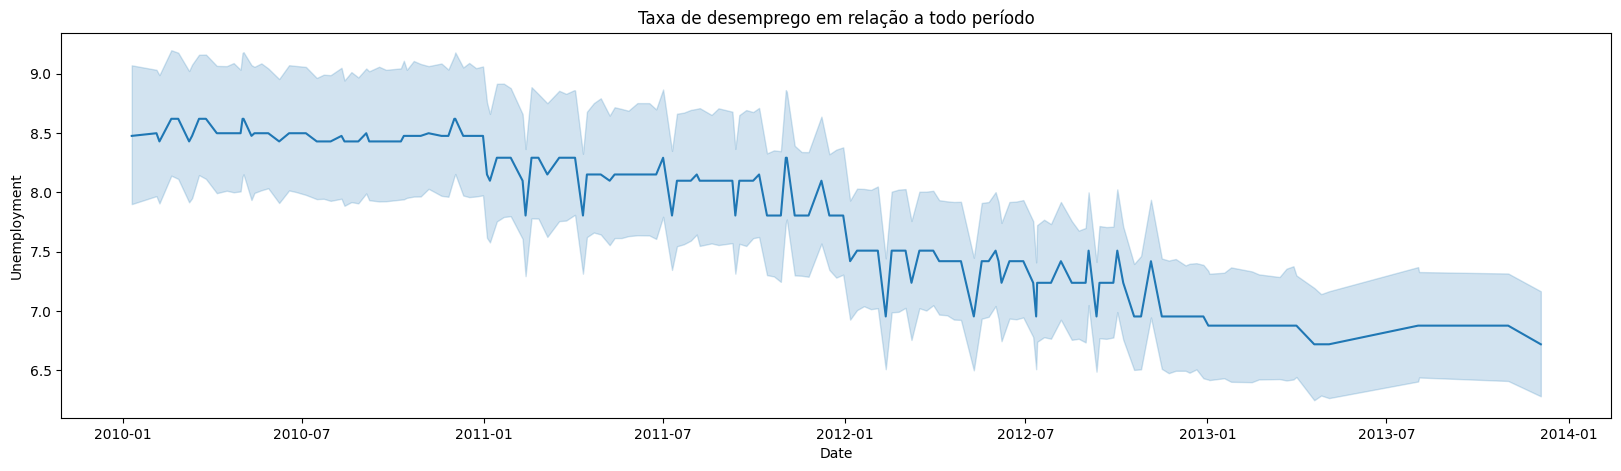

In [ ]:
plt.figure(figsize=(20,5))
plt.title("Taxa de desemprego em relação a todo período")
sns.lineplot(data=df3 , x = df3.Date, y = df3.Unemployment)


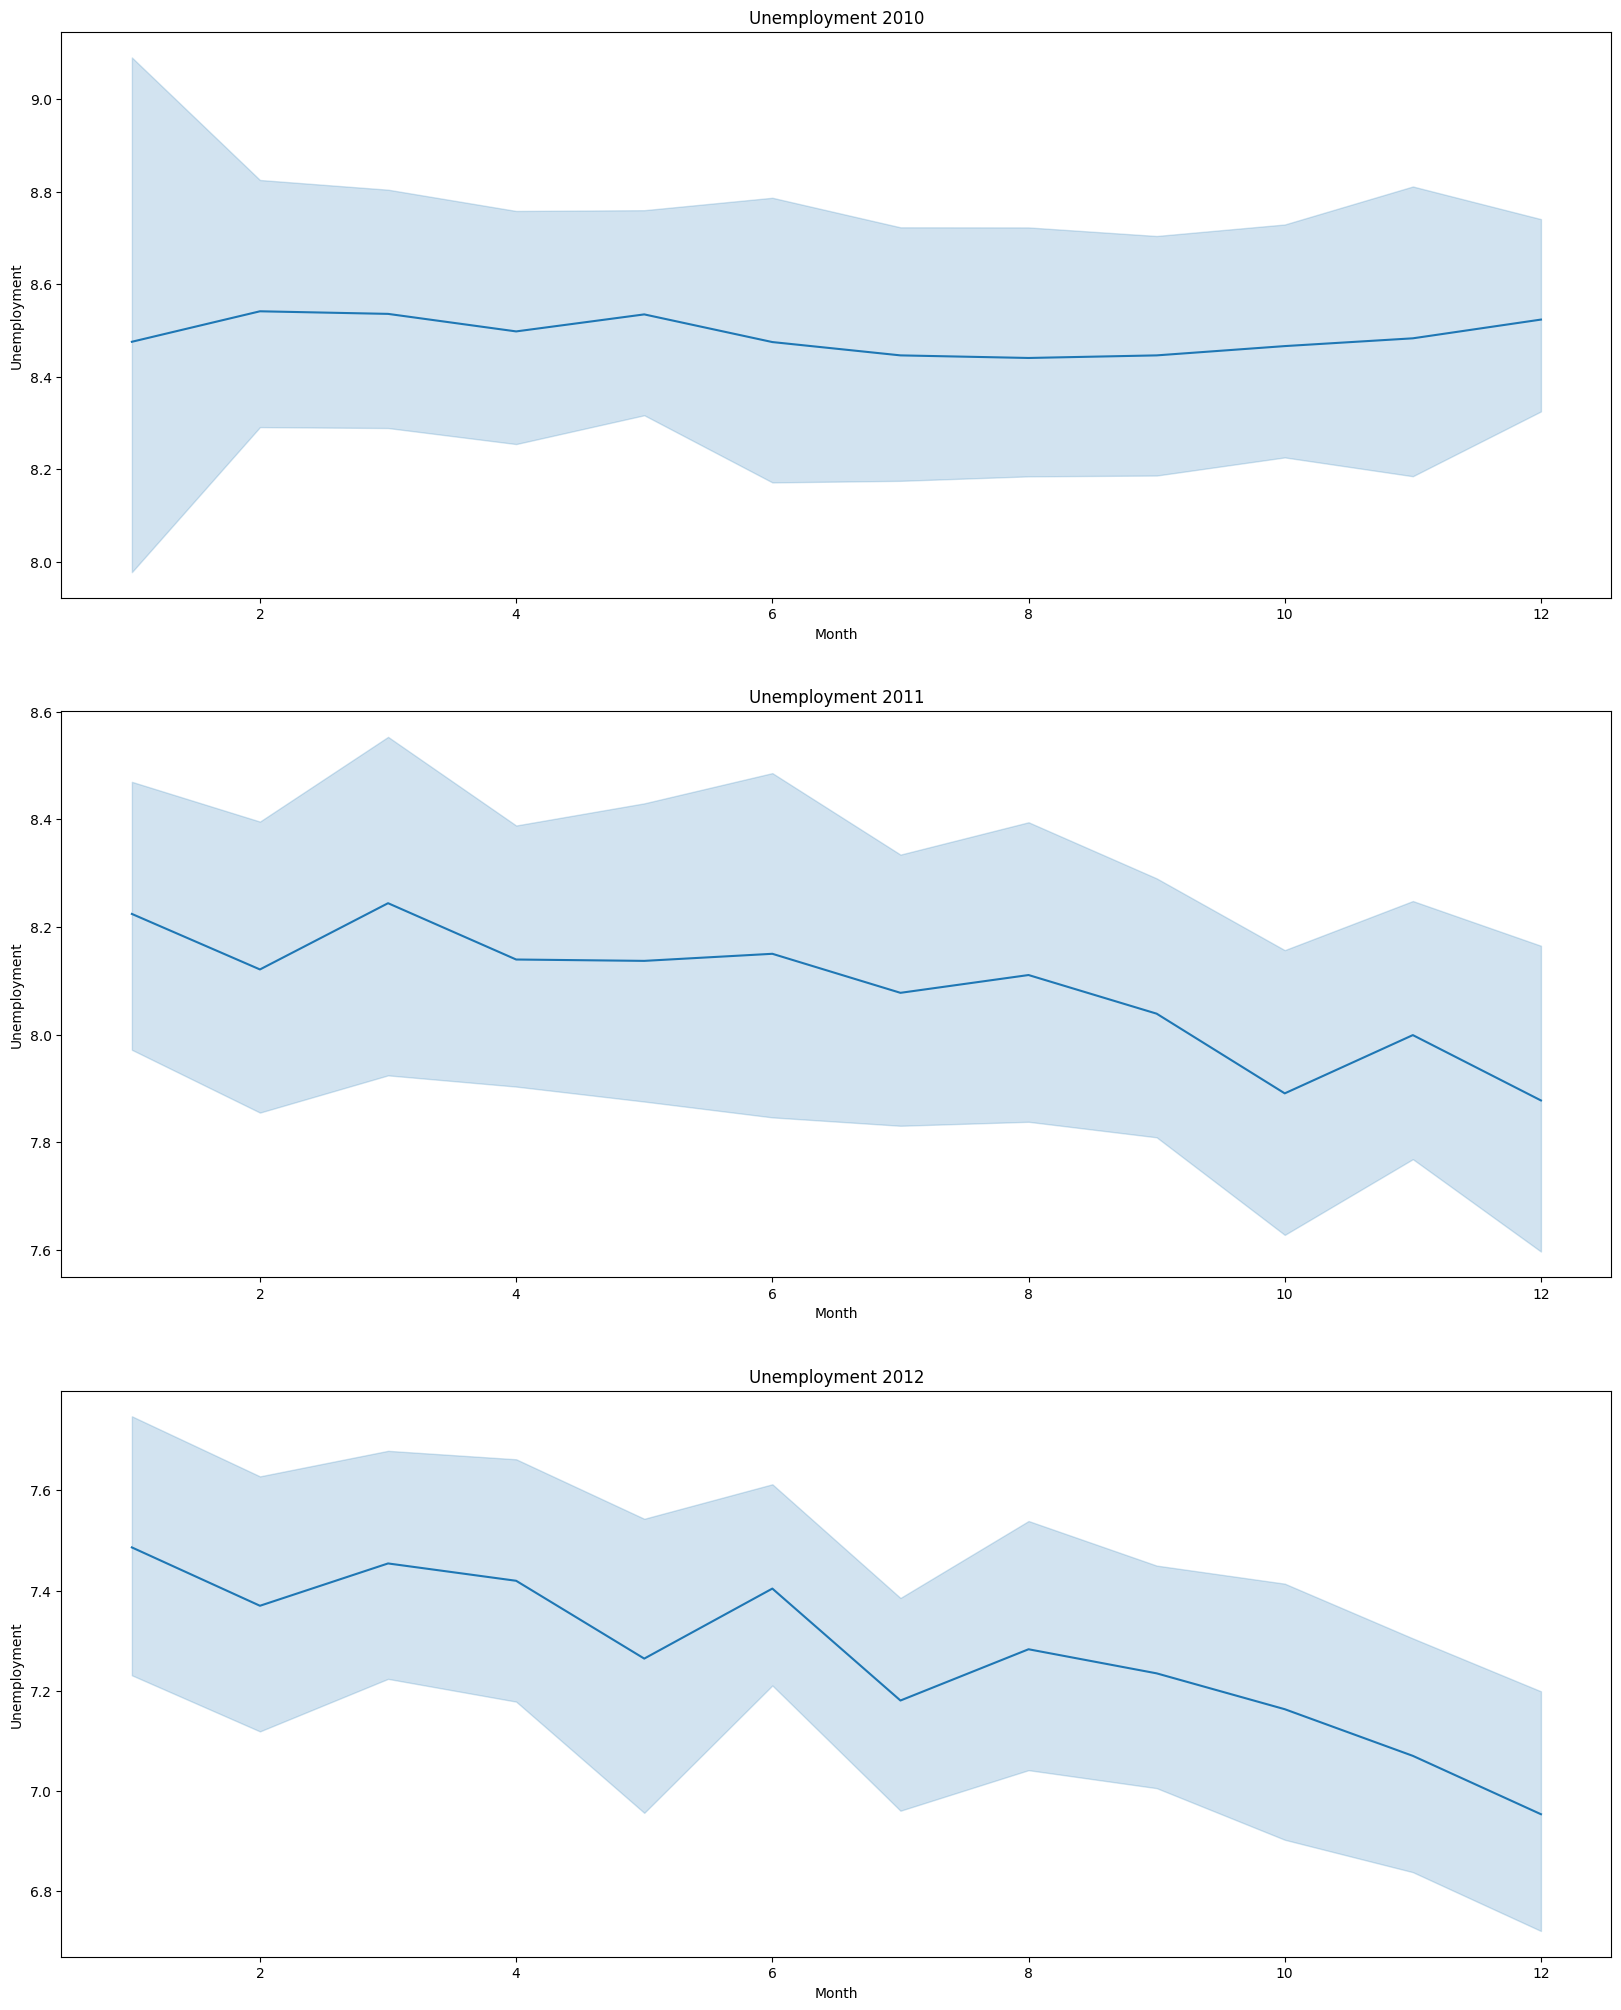

In [ ]:
#Plot de taxa de desemprego para os anos 2010, 2011  e 2012
plt.figure(figsize=(20,25))
plt.subplot(3,1,1)
df3_2010 = df3.where(df3['Year'] == 2010)
plt.title("Unemployment 2010")
sns.lineplot(data=df3_2010 , x = df3_2010.Month, y = df3_2010.Unemployment)

plt.subplot(3,1,2)
df3_2011 = df3.where(df3['Year'] == 2011)
plt.title("Unemployment 2011")
sns.lineplot(data=df3_2011 , x = df3_2011.Month, y = df3_2011.Unemployment)

plt.subplot(3,1,3)
df3_2012 = df3.where(df3['Year'] == 2012)
plt.title("Unemployment 2012")
sns.lineplot(data=df3_2012 , x = df3_2012.Month, y = df3_2012.Unemployment)
plt.show()

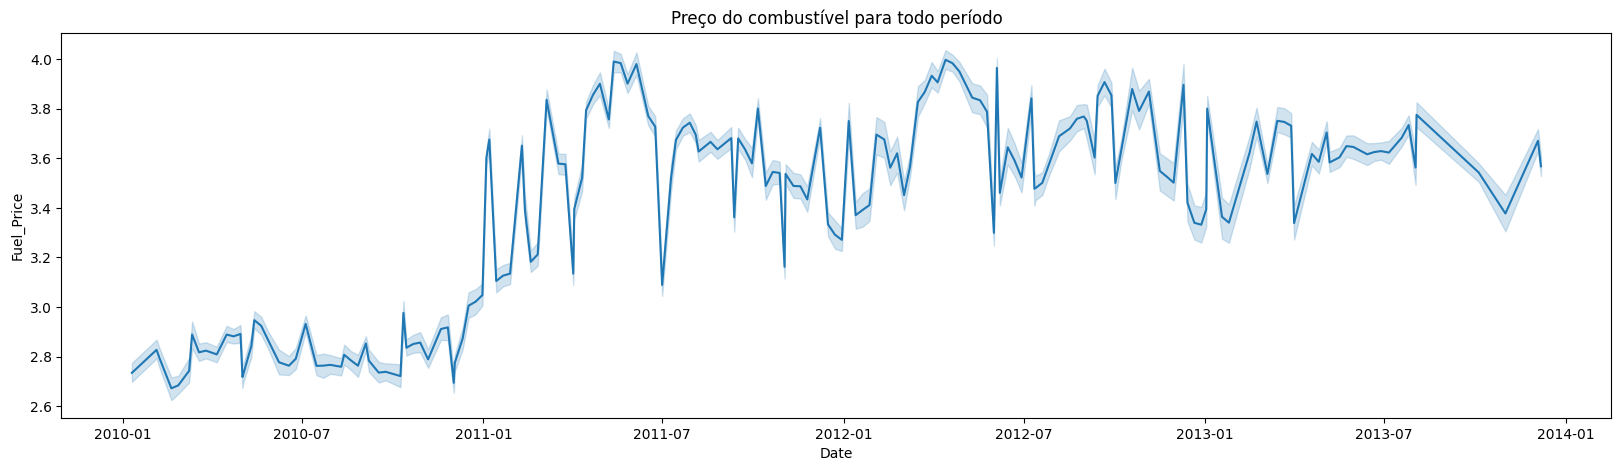

In [ ]:
#Preço do combustível para todo o período
plt.figure(figsize=(20,5))
plt.title("Preço do combustível para todo período")
sns.lineplot(data=df3 , x = df3.Date, y = df3.Fuel_Price)
plt.show()

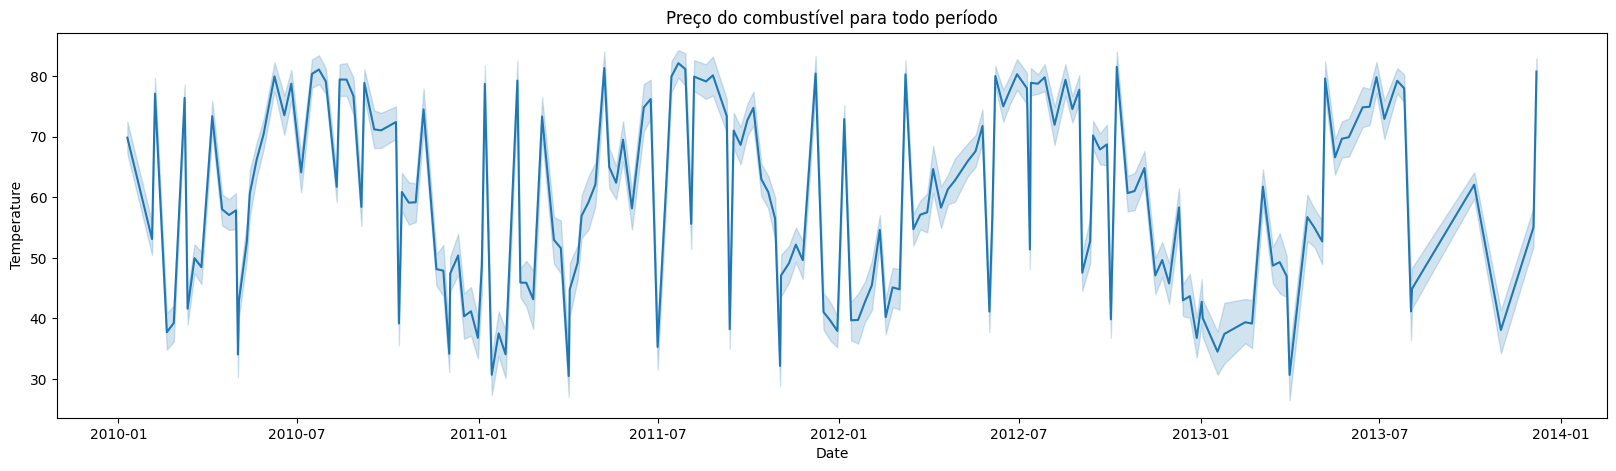

In [ ]:
#Preço do combustível para todo o período
plt.figure(figsize=(20,5))
plt.title("Preço do combustível para todo período")
sns.lineplot(data=df3 , x = df3.Date, y = df3.Temperature)
plt.show()

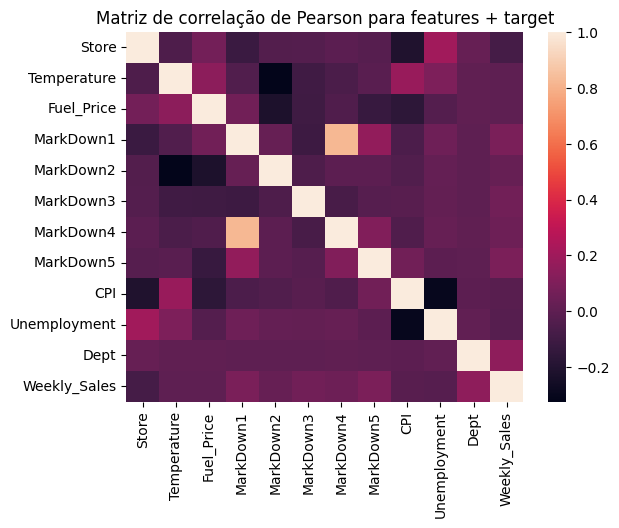

In [ ]:
df_corr = pd.merge(df3, df1, on=['Store', "Date"], how='inner')
df_corr = df_corr.drop(["Date","IsHoliday_x", "IsHoliday_y"], axis = 1)
df_corr = df_corr.corr()
sns.heatmap(df_corr)
plt.title("Matriz de correlação de Pearson para features + target")
plt.show()


## 4 - Pré-processamento de dados (Documentação parte 2):

**JOIN**

A estratégia de pré-processamento é iniciada é pela  junção dos 3 datasets.  Primeiramente, a junção foi realizada entre o Sales dataset e Store dataset através da chave `"Store"`, comum a ambos. Em seguida, o Features dataset é adicionado ao cojunto de dados, dessa vez, com uso das chaves `"Store"`e `"Date"` a fim de que o join não gere duplicidade de dados.
<br/>
<br/>
Essa medida gera duas consequências diretas:
<br/>
<br/>
**1** - O dataset conjunto passa a ter dados de *2010 a 2012*, sendo descartados todos os dados após essa data;
<br/>
**2** - as Features CPI e Unenployment que possuem dados faltantes, após a junção, perdem seus nulos não necessitando mais de abordagem para tratamento de dados incompletos;

**SORT VALUES**

A feature "Date" foi utilizada como critério de ordenação do dataset

**DUMMIES**

A feature "Type" é categórica e possui cardinalidade = 3, nesse contexto, após a criação de dummies, a feature foi excluída sem aumento significativo da cardinalidade do dataset.

**DROP**

Todas as features de Markdown possuem aproximadamente 50% de valores nulos e apresentam multicolineariedade entre si, sendo assim, foram retiradas do conjunto de dados. As features relacionadas a data ("Date, "IsHoliday") também foram excluídas do conjunto para que a perfomance da modelagem seja otimizada.



**ESCALONAMENTO**

Devido a grande diferença de escala entre algumas features, todo o dataset foi escalonado com a função MinMaxScaler(), em seguida, é gerada uma matriz de correlação para verificação de possível multicolinearidade entre as varíaveis.


**FEATURE SELECTION**

Para otimizar a escolha das varíaveis, foi utilizada a técnica Maximum Relevancy Minimum Redundancy [MRMR](https://www.google.com "Github da biblioteca") que seleciona as features altamente relacionadas com a target, excluindo do conjunto, as variáveis relacionadas entre si.



### 4.1 - JOIN:

In [ ]:
merged_df = pd.merge(df1, df2, on='Store')


In [ ]:
#Join de dataset de sales dataset e features dataset

merged_df = pd.merge(df3, merged_df, on=['Store', "Date"], how='inner')

In [ ]:
#Conferência de valores duplicados
duplicated_df = merged_df.duplicated().sum()
print(f"Valores duplicados após join: {duplicated_df}")


Valores duplicados após join: 0


In [ ]:
#Conferência de integridade do df
merged_df.shape

(421570, 17)

<Axes: >

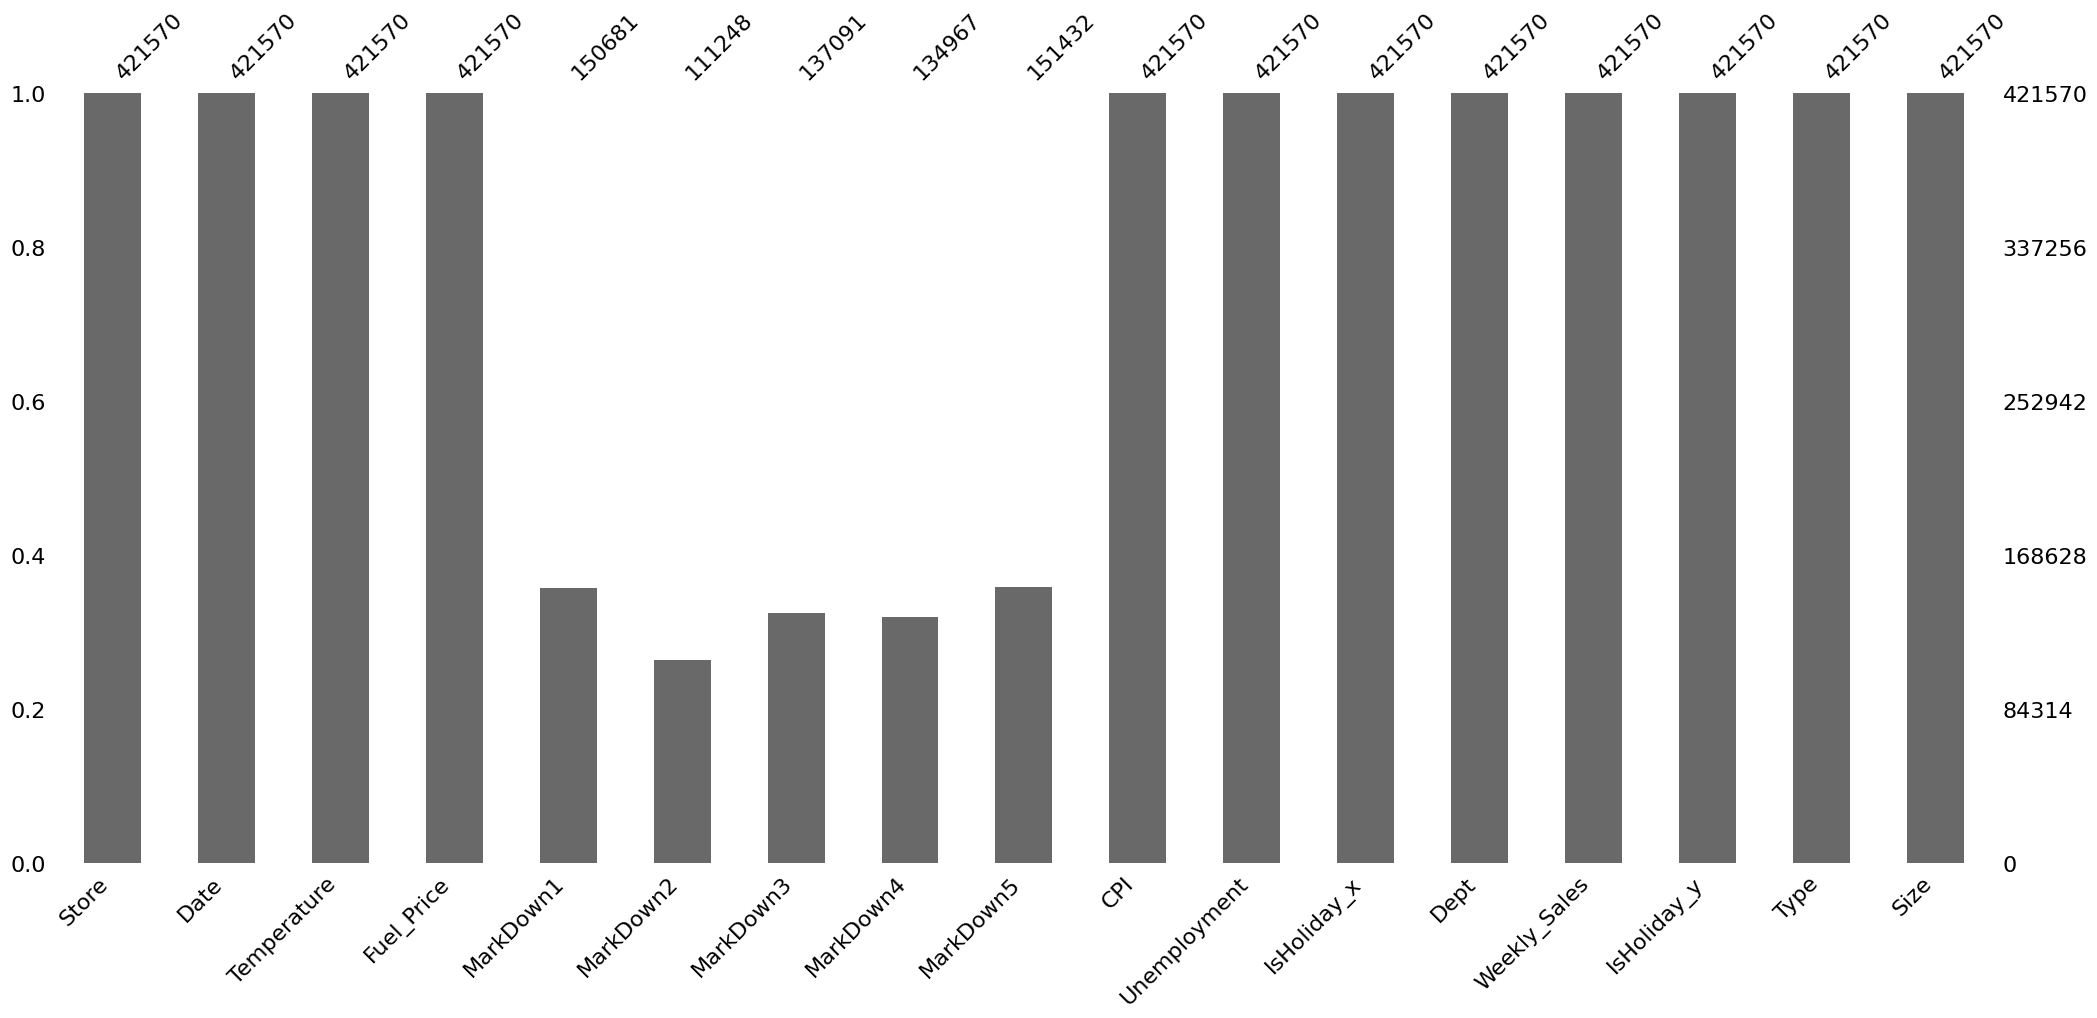

In [ ]:
#Verificação de composição de nulos após o JOIN
msno.bar(merged_df)

### 4.2 - SORT VALUES:

In [ ]:
# Tranformação da coluna "Date" em formato de data
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [ ]:
# Amplitude da coluna data
min_date = merged_df['Date'].min()
max_date = merged_df['Date'].max()
print('Período de tempo: {} a {}'.format(min_date, max_date))

Período de tempo: 2010-01-10 00:00:00 a 2012-12-10 00:00:00


In [ ]:
#Ordenação do dataset usando a feature "Date" como critério de ordenação
merged_df = merged_df.sort_values("Date")

### 4.3 - DUMMIES:

In [ ]:
#Transformação da variável categórica "Type" para formato Dummies
dummies = pd.get_dummies(merged_df['Type'])

# concatenando os dummies no dataframe original
merged_df = pd.concat([merged_df, dummies], axis=1)



(421570, 20)

In [ ]:
merged_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size,A,B,C
120124,13,2010-01-10,68.74,2.853,NaN,NaN,NaN,NaN,NaN,126.234600,7.795,False,14,20922.18,False,A,219622,1,0,0
373364,40,2010-01-10,62.01,2.717,NaN,NaN,NaN,NaN,NaN,132.756800,5.287,False,74,9872.41,False,A,155083,1,0,0
373365,40,2010-01-10,62.01,2.717,NaN,NaN,NaN,NaN,NaN,132.756800,5.287,False,79,10840.77,False,A,155083,1,0,0
259245,27,2010-01-10,70.19,2.840,NaN,NaN,NaN,NaN,NaN,136.629757,8.021,False,98,9837.86,False,A,204184,1,0,0
259244,27,2010-01-10,70.19,2.840,NaN,NaN,NaN,NaN,NaN,136.629757,8.021,False,97,19095.76,False,A,204184,1,0,0


### 4.4 - DROP:

In [ ]:
# Drop de features que não serão utilizadas na modelagem
merged_df = merged_df.drop(["Date",'MarkDown1', 'MarkDown2','MarkDown3', 'MarkDown4', 'MarkDown5', 'IsHoliday_x', 'IsHoliday_y', 'Type'], axis=1)


In [ ]:
#Conferência de columns após o drop
merged_df.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Dept',
       'Weekly_Sales', 'Size', 'A', 'B', 'C'],
      dtype='object')

In [ ]:
#Salvando cópia de df tratado
merged_df.to_csv('/content/drive/My Drive/Colab Notebooks/FEA_DEV_preprocessed.csv', index=False)

In [3]:
processed_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/FEA_DEV_preprocessed.csv')
processed_data.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,A,B,C
0,13,68.74,2.853,126.234600,7.795,14,20922.18,219622,1,0,0
1,40,62.01,2.717,132.756800,5.287,74,9872.41,155083,1,0,0
2,40,62.01,2.717,132.756800,5.287,79,10840.77,155083,1,0,0
3,27,70.19,2.840,136.629757,8.021,98,9837.86,204184,1,0,0
4,27,70.19,2.840,136.629757,8.021,97,19095.76,204184,1,0,0


### 4.5 - ESCALONAMENTO: 

In [4]:
#Escalonamento de variáveis devido a grande diferença entre escalas
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(processed_data)

In [5]:
#Transformação de array escalonado em df nomes de colunas atribuídos
columns = ['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Dept',
       'Weekly_Sales', 'Size', 'A', 'B', 'C']
scaled_df = pd.DataFrame(scaled_data, columns = columns)

In [ ]:
scaled_df_corr = scaled_df.corr()

In [ ]:
#Matriz de correlação de pearson com variáveis escalonadas
scaled_df_corr

,Store,Temperature,Fuel_Price,CPI,Unemployment,Dept,Weekly_Sales,Size,A,B,C
Store,1.000000,-0.050268,0.062553,-0.210777,0.206531,0.025313,-0.084954,-0.181600,-0.036912,-0.231461,0.436989
Temperature,-0.050268,1.000000,0.083288,0.175775,0.158778,0.003905,-0.003831,-0.054961,0.026003,-0.106938,0.130241
Fuel_Price,0.062553,0.083288,1.000000,-0.178920,0.025366,0.002415,0.003025,0.008495,-0.035505,0.036606,-0.000307
CPI,-0.210777,0.175775,-0.178920,1.000000,-0.296741,-0.007956,-0.021331,-0.004461,0.082994,-0.082592,-0.004107
Unemployment,0.206531,0.158778,0.025366,-0.296741,1.000000,0.009812,-0.024832,-0.082161,-0.094188,-0.027275,0.201004
Dept,0.025313,0.003905,0.002415,-0.007956,0.009812,1.000000,0.144202,-0.003951,0.012275,-0.031138,0.030095
Weekly_Sales,-0.084954,-0.003831,0.003025,-0.021331,-0.024832,0.144202,1.000000,0.242331,0.183579,-0.129527,-0.095351
Size,-0.181600,-0.054961,0.008495,-0.004461,-0.082161,-0.003951,0.242331,1.000000,0.763327,-0.457637,-0.527798
A,-0.036912,0.026003,-0.035505,0.082994,-0.094188,0.012275,0.183579,0.763327,1.000000,-0.815157,-0.341574
B,-0.231461,-0.106938,0.036606,-0.082592,-0.027275,-0.031138,-0.129527,-0.457637,-0.815157,1.000000,-0.265966


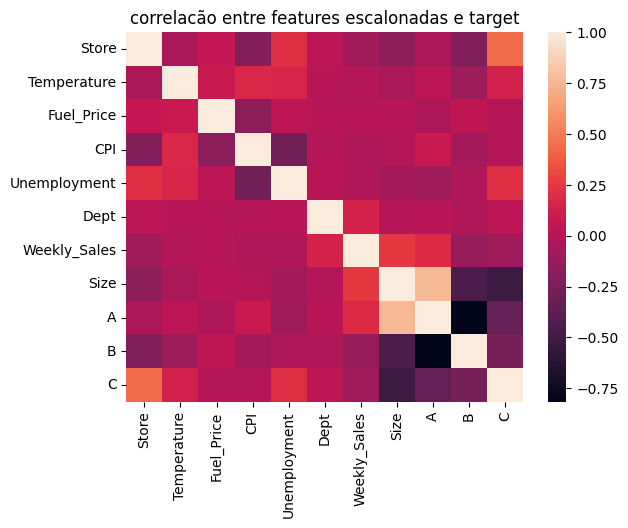

In [ ]:

plt.title("correlacão entre features escalonadas e target")
sns.heatmap(scaled_df_corr)
plt.show()

### 4.6 - FEATURE SELECTION:

In [ ]:
#Install das biblioteca de feature selection
pip install mrmr_selection

In [ ]:
X_mrmr = scaled_df.drop("Weekly_Sales", axis=1)
y_mrmr = scaled_df["Weekly_Sales"]

In [ ]:
import mrmr
score =  mrmr.mrmr_regression(X_mrmr, y_mrmr, 10, relevance='f', redundancy='c', denominator='mean', cat_features=None, cat_encoding='leave_one_out', only_same_domain=False, return_scores=True,n_jobs=-1, show_progress=True)

100%|██████████| 10/10 [00:01<00:00,  7.19it/s]


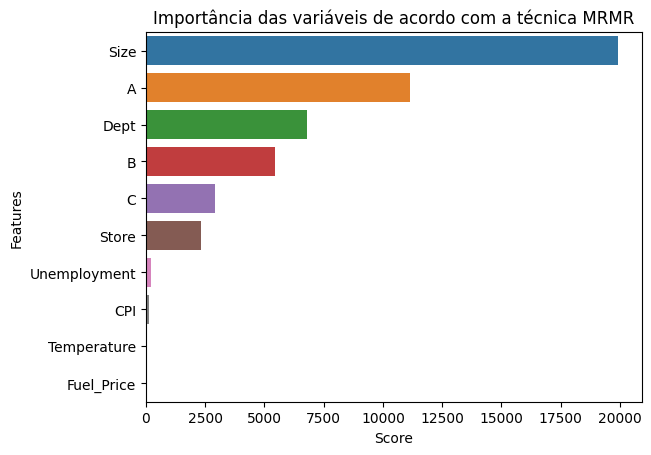

In [ ]:
#Criação do plot com score atribuídos às variávfeatures
score_df = pd.DataFrame(score[1])
score_df = score_df.reset_index().sort_values(0, ascending=False)
score_df.rename(columns={'index': 'Features', 0: 'Score'}, inplace=True)
sns.barplot(score_df, x = score_df["Score"], y = score_df["Features"])
plt.title("Importância das variáveis de acordo com a técnica MRMR")
plt.show()

In [7]:
#Drop de colunas com score pouco significativo em relação a target de acordo com a técnica de feature selectoion adotada

scaled_df = scaled_df.drop(['Temperature', 'Fuel_Price', 'CPI', 'Unemployment'], axis = 1)
scaled_df.head()

,Store,Dept,Weekly_Sales,Size,A,B,C
0,0.272727,0.132653,0.037117,1.000000,1.0,0.0,0.0
1,0.886364,0.744898,0.021289,0.650663,1.0,0.0,0.0
2,0.886364,0.795918,0.022676,0.650663,1.0,0.0,0.0
3,0.590909,0.989796,0.021239,0.916437,1.0,0.0,0.0
4,0.590909,0.979592,0.034501,0.916437,1.0,0.0,0.0


In [8]:
# Preenchimento de valores faltantes na coluna C
scaled_df['C'] = scaled_df['C'].fillna(0)

## 5 - Modelagem (Documentação parte 3):

A etapa de modelagem foi iniciada com realização da validação cruzada para dois tipos de modelos: Random Forest e XGBoost, ambos para tarefas de regressão. A ideia é escolher o modelo com melhor perfomance e em seguida, aplicar a técnica de Grid Search para tuning dos hiperparametros do modelo. 
<br/>

A métrica utilizada na validação cruzada para verificar a perfomance dos modelos foi o R^2 dada a sua fácil interpretação.


- R^2 médio para random forests: **0.901**

- R^2 médio para XGB: **0.893**


~Uma vez que Random Forest apresentou perfomance melhor, a etapa de Grid Search foi iniciada para que a melhor combinação de hiperparametros pudesse ser encontrada. Essa etapa foi computacionalmente cara~

<mark>O tuning de hiperparâmetros foi tentado por 3 vezes sendo insucedido e com tempo computacional final muito alto levando **6 horas** na soma das tentativas,  sendo assim, embora o código conste do notebook, o tuning não foi aplicado para que o projeto pudesse ser entregue dentro do prazo ainda que incompleto. Como foi demonstrado na etapa de validação cruzada, a perfomance do modelo sem Grid Search já apresenta bons resultados, tornando o Grid Search etapa necessária, mas não fundamental. </mark>



In [9]:
X = scaled_df.drop("Weekly_Sales", axis=1)
y = scaled_df["Weekly_Sales"] 

In [ ]:
X.head()

,Store,Dept,Size,A,B,C
0,0.272727,0.132653,1.000000,1.0,0.0,0.0
1,0.886364,0.744898,0.650663,1.0,0.0,0.0
2,0.886364,0.795918,0.650663,1.0,0.0,0.0
3,0.590909,0.989796,0.916437,1.0,0.0,0.0
4,0.590909,0.979592,0.916437,1.0,0.0,0.0


In [ ]:
y.head()

0    0.037117
1    0.021289
2    0.022676
3    0.021239
4    0.034501
Name: Weekly_Sales, dtype: float64

###5.1 - Validação cruzada

In [10]:
# Divide os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definição dos modelos a serem validados
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Validação cruzada usando XGBoost
rf_scores = cross_val_score(rf, X, y, cv=5, scoring="r2")
# Validação cruzada usando XGBoost
xgb_scores = cross_val_score(xgb, X, y, cv=5, scoring="r2")

# Print de resultados


print("Random Forests R^2 scores:", rf_scores)
print("Mean R^2:", np.mean(rf_scores))
print("XGBoost R^2 scores:", xgb_scores)
print("Mean R^2:", np.mean(xgb_scores))


Random Forests R^2 scores: [0.93735701 0.81809576 0.94857412 0.86167571 0.94284066]
Mean R^2: 0.9017086515335635
XGBoost R^2 scores: [0.92850381 0.8105934  0.94025184 0.85404485 0.9365656 ]
Mean R^2: 0.8939919009471907


### 5.2 - ~Tuning de hiperparâmetros~

In [ ]:
#GRID_SEARCH

param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10, 30, 50],
    'min_samples_split' :[2, 5],
    'min_samples_leaf' : [1,2,4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Imprime os resultados da busca em grade
print("Melhores parâmetros:", grid_search.best_params_)
print("Melhor score R^2:", grid_search.best_score_)

# Usa o modelo com os melhores parâmetros para fazer previsões no conjunto de teste
y_pred = grid_search.predict(X_test)

# Calcula o score R^2 do modelo no conjunto de teste
r2 = r2_score(y_test, y_pred)
print("Score R^2 no conjunto de teste:", r2)

### 5.3 - Modelo final

In [13]:

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Fazer as previsões no conjunto de teste
y_pred = rf.predict(X_test)

# Calcular as métricas de desempenho
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Imprimir as métricas de desempenho
print('MAE:', round(mae,2))
print('MSE:', round(mse,2))
print('RMSE:', round(rmse,2))
print('R^2:', round(r2,2))

MAE: 0.0
MSE: 0.0
RMSE: 0.01
R^2: 0.9


In [15]:
#Métricas arredondadas
print('MAE:',mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R^2:', r2)

MAE: 0.0038130206751909347
MSE: 9.969991615661102e-05
RMSE: 0.009984984534620522
R^2: 0.9048804316750337


In [16]:
df_final = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df_final.head()

,Real Values,Predicted Values
272342,0.082876,0.091254
176581,0.016142,0.020157
354212,0.062704,0.061015
281444,0.041403,0.043124
124208,0.007490,0.007241


In [ ]:
df_final.shape

(126471, 2)

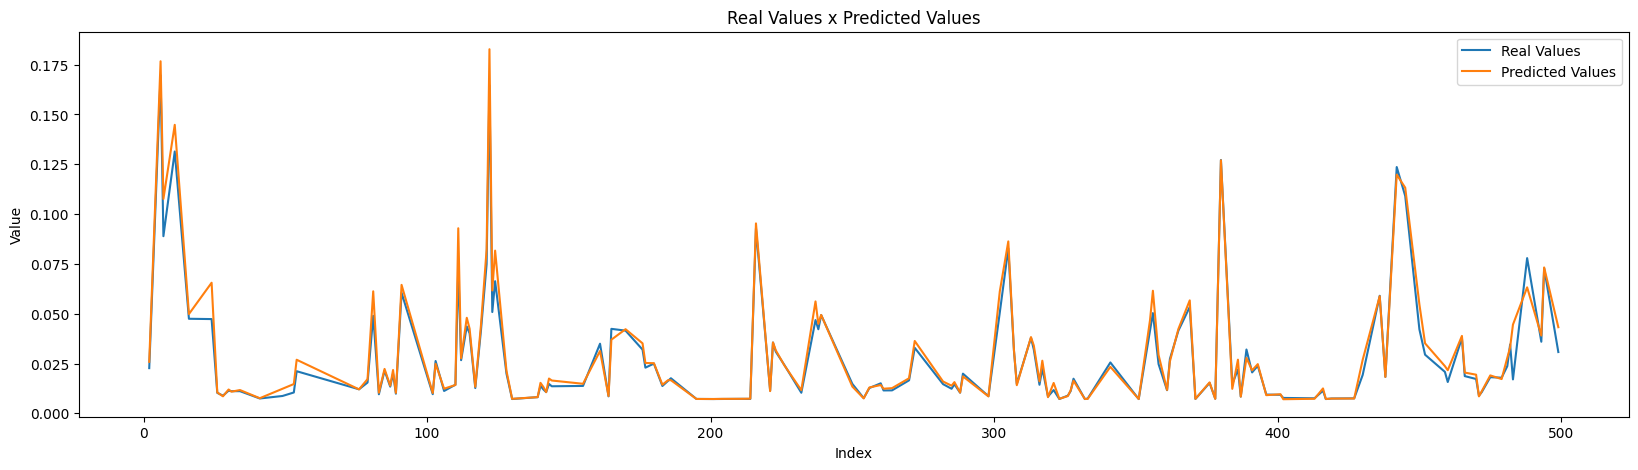

In [18]:
# Ordenando o dataframe com base no índice
df_final = df_final.sort_index()
df_final = df_final.loc[:500]

# Definindo o tamanho da figura
plt.figure(figsize=(20, 5))

# Plotando as linhas
plt.plot(df_final['Real Values'], label='Real Values')
plt.plot(df_final['Predicted Values'], label='Predicted Values')

# Adicionando título e legendas
plt.title('Real Values x Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Mostrando o gráfico
plt.show()

### 6 - Avaliação do modelo e sugestão de melhorias (Documentação parte 4)


Para uma avaliação completa do modelo, foram adotadas as métricas de **MAE**, **MSE**, **RMSE** e **R^2** para efeito de comparação.


Embora a etapa de GridSearch não tenha sido aplicada, nota-se que o desempenho do modelo final apresenta excelentes resultados e por isso pedem atenção especial:

**Métricas**:

MAE: **0.000**

MSE: **9.969**

RMSE: **0.009**

R^2: **0.904**



Estes valores indicam que o modelo provavelmente está com over fitting e a evidência disso aparece no gráfico de y_test X y_pred acima e na comparação do valores conforme dataframe abaixo:


│   Real Values │  Predicted Values │

  
 0.037117 │           0.044971 │


   
 0.022676 │           0.026132 │



    
 0.169636 │           0.180745 │

<br/>
 Uma possível melhoria para modelo requer utilizar do Grid Search que não foi aplicado pelos motivos explicitados, reduzir a complexidade do modelo, atuar sobre a regularização e   especialmente, **uma hipótese**  que eu gostaria de testar é **separar** o dataset em **intervalos de tempo** como trimestre ou quadrimestre, somando o volume de vendas respectivos às separações. 
Para todos os efeitos, o modelo funciona adequadamente e está generalizando como deveria.


 